# Model Selection and Deployment (Classification Problem)

> Select a suitable model to predict cancer type  
>
> A possible workflow that can be followed to identify a suitable prediction model and finally deployed it
> using H2O and Node.js

In [120]:
import pandas as pd

## Initialise H2O

In [1]:
import h2o

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.6" 2020-01-14; OpenJDK Runtime Environment (build 11.0.6+8-b765.1); OpenJDK 64-Bit Server VM (build 11.0.6+8-b765.1, mixed mode)
  Starting server from /Users/massimo/Dropbox/Personal Development/myenv01/myenv01/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/lw/y7_nvcq156v_pk0rqcyk29l40000gn/T/tmpewvrt87n
  JVM stdout: /var/folders/lw/y7_nvcq156v_pk0rqcyk29l40000gn/T/tmpewvrt87n/h2o_massimo_started_from_python.out
  JVM stderr: /var/folders/lw/y7_nvcq156v_pk0rqcyk29l40000gn/T/tmpewvrt87n/h2o_massimo_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.3
H2O_cluster_version_age:,8 months and 8 days !!!
H2O_cluster_name:,H2O_from_python_massimo_mly9sd
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


> Select a class of Models Estimators

In [3]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [4]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

# Import and Prepare Data

## Import Data & First Review

> Import data to h2o dataframe

In [5]:
data = h2o.import_file('../data/cancer_tumor.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


> Data Exploration

In [6]:
data.head()

diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
M,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902
M,19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.00615,0.04006,0.03832,0.02058,0.0225,0.004571,23.57,25.53,152.5,1709,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,0.09744,0.4956,1.156,3.445,27.23,0.00911,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173
M,20.29,14.34,135.1,1297,0.1003,0.1328,0.198,0.1043,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.01149,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.2,1575,0.1374,0.205,0.4,0.1625,0.2364,0.07678
M,12.45,15.7,82.57,477.1,0.1278,0.17,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.00751,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.1244
M,18.25,19.98,119.6,1040,0.09463,0.109,0.1127,0.074,0.1794,0.05742,0.4467,0.7732,3.18,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.2,1606,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
M,13.71,20.83,90.2,577.9,0.1189,0.1645,0.09366,0.05985,0.2196,0.07451,0.5835,1.377,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.6,897,0.1654,0.3682,0.2678,0.1556,0.3196,0.1151
M,13,21.82,87.5,519.8,0.1273,0.1932,0.1859,0.09353,0.235,0.07389,0.3063,1.002,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.2,739.3,0.1703,0.5401,0.539,0.206,0.4378,0.1072
M,12.46,24.04,83.97,475.9,0.1186,0.2396,0.2273,0.08543,0.203,0.08243,0.2976,1.599,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.01008,15.09,40.68,97.65,711.4,0.1853,1.058,1.105,0.221,0.4366,0.2075


In [7]:
data.describe()

Rows:569
Cols:31




,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
type,enum,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real
mins,,6.981,9.71,43.79,143.5,0.05263,0.01938,0.0,0.0,0.106,0.04996,0.1115,0.3602,0.757,6.802,0.001713,0.002252,0.0,0.0,0.007882,0.0008948,7.93,12.02,50.41,185.2,0.07117,0.02729,0.0,0.0,0.1565,0.05504
mean,,14.127291739894552,19.289648506151146,91.96903339191563,654.8891036906855,0.09636028119507907,0.10434098418277679,0.0887993158172232,0.04891914586994728,0.18116186291739894,0.06279760984182778,0.40517205623901575,1.2168534270650264,2.866059226713533,40.33707908611599,0.007040978910369067,0.025478138840070295,0.03189371634446397,0.011796137082601054,0.02054229876977153,0.0037949038664323374,16.269189806678384,25.677223198594024,107.26121265377857,880.5831282952548,0.1323685940246046,0.2542650439367311,0.27218848330404216,0.11460622319859401,0.29007557117750443,0.08394581722319859
maxs,,28.11,39.28,188.5,2501.0,0.1634,0.3454,0.4268,0.2012,0.304,0.09744,2.873,4.885,21.98,542.2,0.03113,0.1354,0.396,0.05279,0.07895,0.02984,36.04,49.54,251.2,4254.0,0.2226,1.058,1.252,0.291,0.6638,0.2075
sigma,,3.5240488262120775,4.30103576816695,24.298981038754906,351.9141291816529,0.01406412813767362,0.052812757932512194,0.07971980870789347,0.038802844859153605,0.027414281336035712,0.00706036279508446,0.2773127329861039,0.5516483926172023,2.0218545540421076,45.49100551613181,0.0030025179438390656,0.017908179325677388,0.03018606032298841,0.006170285174046869,0.008266371528798397,0.002646070967089195,4.833241580469323,6.14625762303832,33.602542269036356,569.356992669949,0.022832429404835465,0.15733648891374197,0.2086242806081323,0.06573234119594207,0.061867467537518685,0.018061267348893986
zeros,,0,0,0,0,0,0,13,13,0,0,0,0,0,0,0,0,13,13,0,0,0,0,0,0,0,0,13,13,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.186,0.275,0.08902
2,M,19.69,21.25,130.0,1203.0,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.00615,0.04006,0.03832,0.02058,0.0225,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758


## Select Prediction, Predictors and split data

> Prediction is field "diagnosis"
>
> As it is a classification problem cast "categorical" values

In [8]:
data["diagnosis"] = data["diagnosis"].asfactor()

In [19]:
y = 'diagnosis'
x = [c for c in data.columns if c != y]
print('''
Prediction: "{0}"

Predictors: \n{1}'''.format(y, (',\n').join(x)))


Prediction: "diagnosis"

Predictors: 
radius_mean,
texture_mean,
perimeter_mean,
area_mean,
smoothness_mean,
compactness_mean,
concavity_mean,
concave points_mean,
symmetry_mean,
fractal_dimension_mean,
radius_se,
texture_se,
perimeter_se,
area_se,
smoothness_se,
compactness_se,
concavity_se,
concave points_se,
symmetry_se,
fractal_dimension_se,
radius_worst,
texture_worst,
perimeter_worst,
area_worst,
smoothness_worst,
compactness_worst,
concavity_worst,
concave points_worst,
symmetry_worst,
fractal_dimension_worst


> Split into Train, Validation and Test

In [20]:
train, valid, test = data.split_frame(ratios=[0.7, 0.10], seed=42)  

## Create Random records for predictions

In [113]:
import json
x = json.loads(test.as_data_frame()[2:3].to_json(orient='records'))

In [116]:
x

[{'diagnosis': 'M',
  'radius_mean': 15.34,
  'texture_mean': 14.26,
  'perimeter_mean': 102.5,
  'area_mean': 704.4,
  'smoothness_mean': 0.1073,
  'compactness_mean': 0.2135,
  'concavity_mean': 0.2077,
  'concave points_mean': 0.09756,
  'symmetry_mean': 0.2521,
  'fractal_dimension_mean': 0.07032,
  'radius_se': 0.4388,
  'texture_se': 0.7096,
  'perimeter_se': 3.384,
  'area_se': 44.91,
  'smoothness_se': 0.006789,
  'compactness_se': 0.05328,
  'concavity_se': 0.06446,
  'concave points_se': 0.02252,
  'symmetry_se': 0.03672,
  'fractal_dimension_se': 0.004394,
  'radius_worst': 18.07,
  'texture_worst': 19.08,
  'perimeter_worst': 125.1,
  'area_worst': 980.9,
  'smoothness_worst': 0.139,
  'compactness_worst': 0.5954,
  'concavity_worst': 0.6305,
  'concave points_worst': 0.2393,
  'symmetry_worst': 0.4667,
  'fractal_dimension_worst': 0.09946}]

In [118]:
records_for_predictions=[{'diagnosis': 'M',
  'radius_mean': 11.34,
  'texture_mean': 15.26,
  'perimeter_mean': 10.5,
  'area_mean': 920.4,
  'smoothness_mean': 0.1073,
  'compactness_mean': 0.2135,
  'concavity_mean': 0.2077,
  'concave points_mean': 0.09756,
  'symmetry_mean': 0.2521,
  'fractal_dimension_mean': 0.27032,
  'radius_se': 0.4388,
  'texture_se': 0.7096,
  'perimeter_se': 4.384,
  'area_se': 44.91,
  'smoothness_se': 0.006789,
  'compactness_se': 0.05328,
  'concavity_se': 0.01446,
  'concave points_se': 0.02252,
  'symmetry_se': 0.03672,
  'fractal_dimension_se': 0.004394,
  'radius_worst': 14.07,
  'texture_worst': 12.08,
  'perimeter_worst': 125.1,
  'area_worst': 980.9,
  'smoothness_worst': 0.139,
  'compactness_worst': 0.5954,
  'concavity_worst': 0.6305,
  'concave points_worst': 0.2393,
  'symmetry_worst': 0.4667,
  'fractal_dimension_worst': 0.09946}]

# Model Selection

## Example 1 - Using a specific Model (Linear Estimator)
> In this case we are applying a specific model we know would work well with the problem.

In [21]:
glm_fit1 = H2OGeneralizedLinearEstimator(family='binomial', model_id='glm_fit1')

> Training Model

In [22]:
glm_fit1.train(x=x, y=y, training_frame=train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  glm_fit1


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,"Elastic Net (alpha = 0.5, lambda = 0.07865 )",30,15,5,py_4_sid_b729




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.0410145494073848
RMSE: 0.20252049132713656
LogLoss: 0.17411758715759157
Null degrees of freedom: 390
Residual degrees of freedom: 375
Null deviance: 521.6041179862931
Residual deviance: 136.1599531572366
AIC: 168.1599531572366
AUC: 0.9975165562913907
AUCPR: 0.9962783765402649
Gini: 0.9950331125827814

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3977922755567123: 


,,B,M,Error,Rate
0,B,235.0,5.0,0.0208,(5.0/240.0)
1,M,4.0,147.0,0.0265,(4.0/151.0)
2,Total,239.0,152.0,0.023,(9.0/391.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.397792,0.970297,151.0
1,max f2,0.348259,0.982962,158.0
2,max f0point5,0.524354,0.979971,136.0
3,max accuracy,0.397792,0.976982,151.0
4,max precision,0.999719,1.000000,0.0
5,max recall,0.234372,1.000000,181.0
6,max specificity,0.999719,1.000000,0.0
7,max absolute_mcc,0.397792,0.951522,151.0
8,max min_per_class_accuracy,0.397792,0.973510,151.0
9,max mean_per_class_accuracy,0.348259,0.977939,158.0



Gains/Lift Table: Avg response rate: 38.62 %, avg score: 38.62 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010230,0.997933,2.589404,2.589404,1.000000,0.999391,1.000000,0.999391,0.026490,0.026490,158.940397,158.940397,0.026490
1,2,0.020460,0.996371,2.589404,2.589404,1.000000,0.997613,1.000000,0.998502,0.026490,0.052980,158.940397,158.940397,0.052980
2,3,0.030691,0.993240,2.589404,2.589404,1.000000,0.994883,1.000000,0.997296,0.026490,0.079470,158.940397,158.940397,0.079470
3,4,0.040921,0.989829,2.589404,2.589404,1.000000,0.991655,1.000000,0.995886,0.026490,0.105960,158.940397,158.940397,0.105960
4,5,0.051151,0.985874,2.589404,2.589404,1.000000,0.988037,1.000000,0.994316,0.026490,0.132450,158.940397,158.940397,0.132450
5,6,0.102302,0.964584,2.589404,2.589404,1.000000,0.974334,1.000000,0.984325,0.132450,0.264901,158.940397,158.940397,0.264901
6,7,0.150895,0.918884,2.589404,2.589404,1.000000,0.943584,1.000000,0.971205,0.125828,0.390728,158.940397,158.940397,0.390728
7,8,0.202046,0.873783,2.589404,2.589404,1.000000,0.899250,1.000000,0.952988,0.132450,0.523179,158.940397,158.940397,0.523179
8,9,0.301790,0.683707,2.589404,2.589404,1.000000,0.778421,1.000000,0.895292,0.258278,0.781457,158.940397,158.940397,0.781457
9,10,0.401535,0.350268,2.058244,2.457460,0.794872,0.510699,0.949045,0.799756,0.205298,0.986755,105.824418,145.745982,0.953422




Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-06-15 21:52:35,0.000 sec,0,260.802059,0.667013,,,,,,,
1,,2022-06-15 21:52:35,0.078 sec,1,108.186750,0.358802,,,,,,,
2,,2022-06-15 21:52:35,0.099 sec,2,78.166856,0.323774,,,,,,,
3,,2022-06-15 21:52:35,0.122 sec,3,69.299655,0.320174,,,,,,,
4,,2022-06-15 21:52:35,0.132 sec,4,68.100692,0.320111,,,,,,,
5,,2022-06-15 21:52:35,0.139 sec,5,68.079977,0.320111,0.20252,0.174118,0.826977,0.997517,0.996278,2.589404,0.023018



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,concave points_worst,0.520373,1.000000,0.161744
1,radius_worst,0.396158,0.761296,0.123135
2,perimeter_worst,0.380191,0.730614,0.118172
3,concave points_mean,0.317995,0.611090,0.098840
4,texture_worst,0.301803,0.579975,0.093807
5,area_worst,0.249605,0.479666,0.077583
6,smoothness_worst,0.222795,0.428146,0.069250
7,perimeter_mean,0.188782,0.362782,0.058678
8,radius_mean,0.175542,0.337338,0.054562
9,concavity_worst,0.148986,0.286306,0.046308



See the whole table with table.as_data_frame()


> Confusion Matrix and Variable Importance

In [27]:
glm_fit1.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3977922755567123: 


,,B,M,Error,Rate
0,B,235.0,5.0,0.0208,(5.0/240.0)
1,M,4.0,147.0,0.0265,(4.0/151.0)
2,Total,239.0,152.0,0.023,(9.0/391.0)


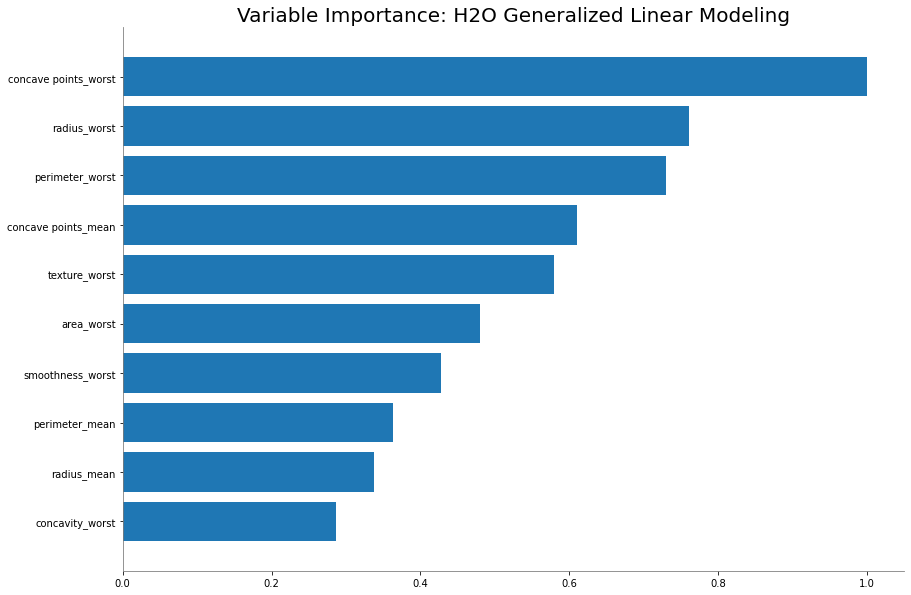

In [28]:
glm_fit1.varimp_plot()

> Performance on Test

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## glm_fit1


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5027998526548495: 


,,B,M,Error,Rate
0,B,81.0,0.0,0.0,(0.0/81.0)
1,M,0.0,40.0,0.0,(0.0/40.0)
2,Total,81.0,40.0,0.0,(0.0/121.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

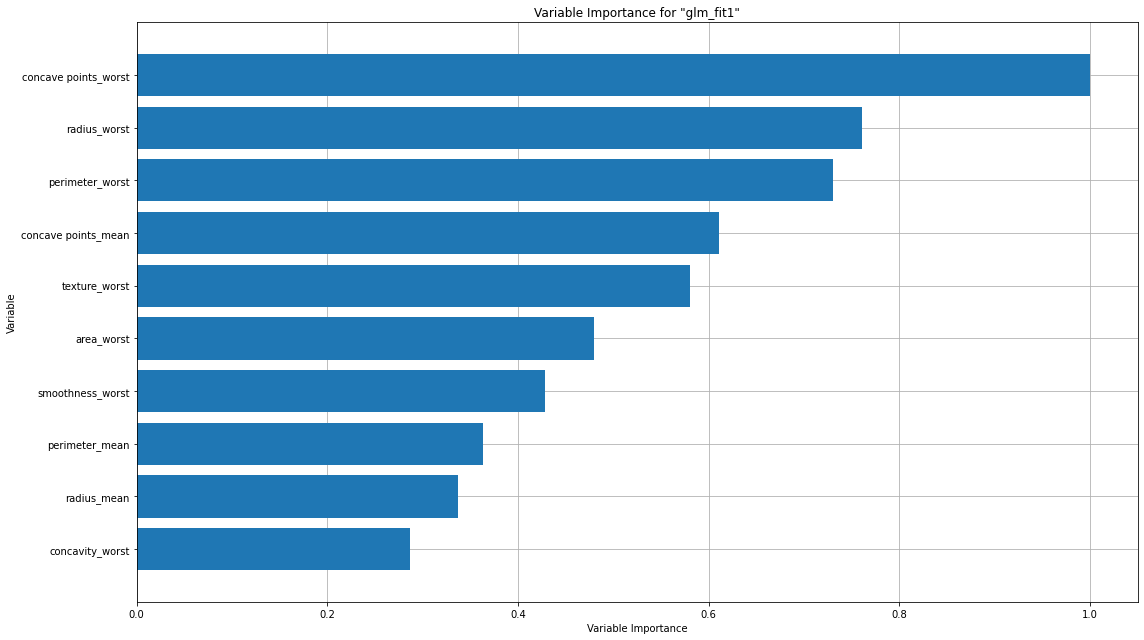

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

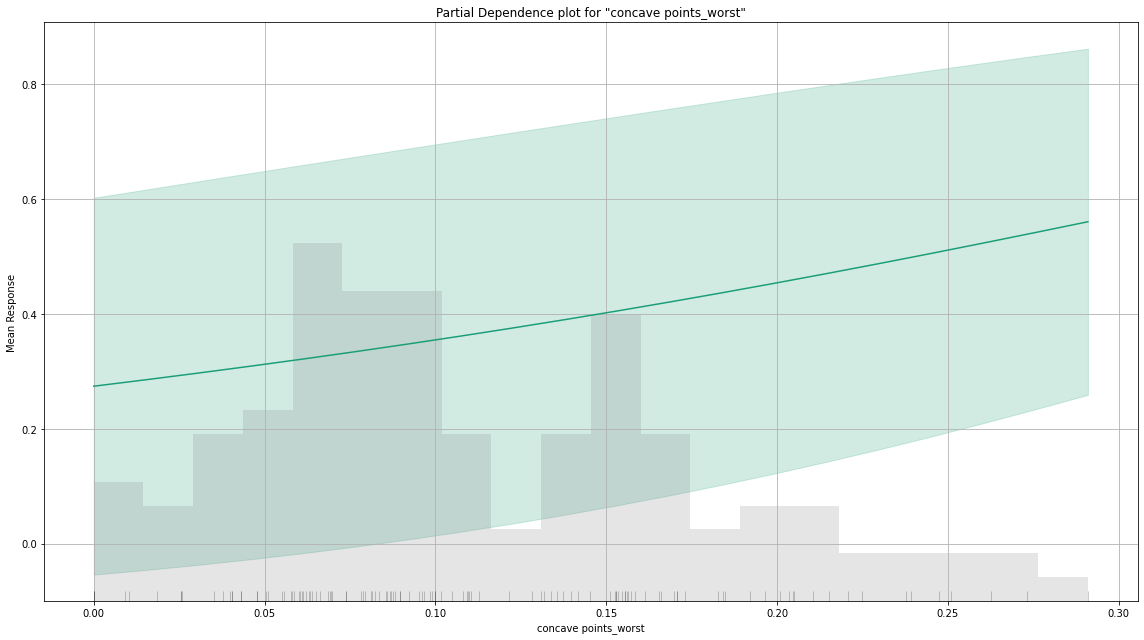

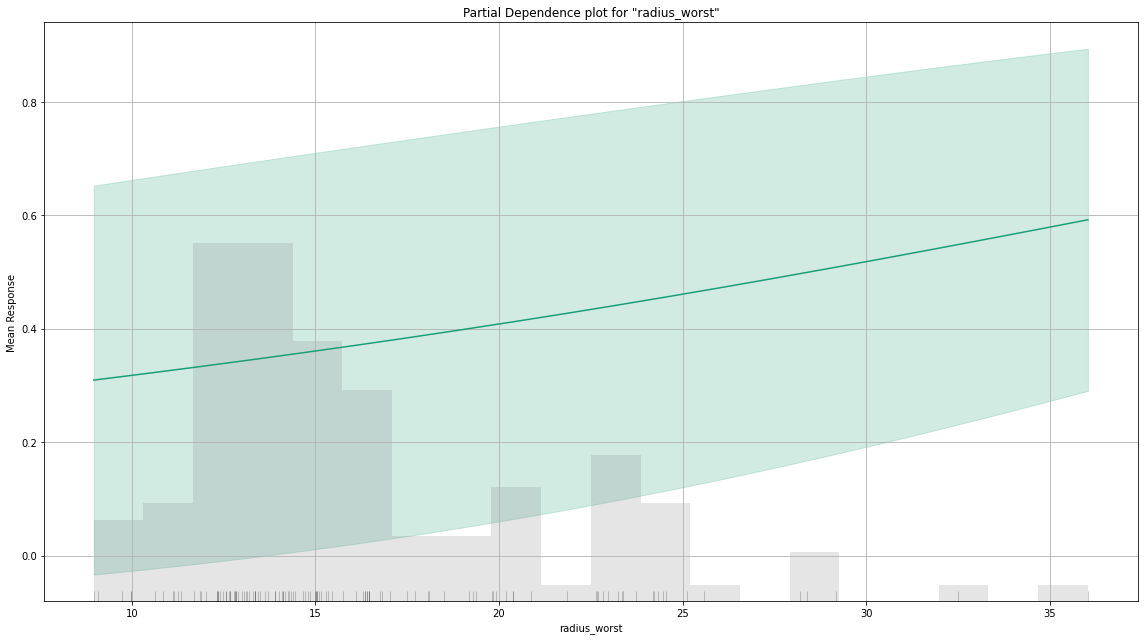

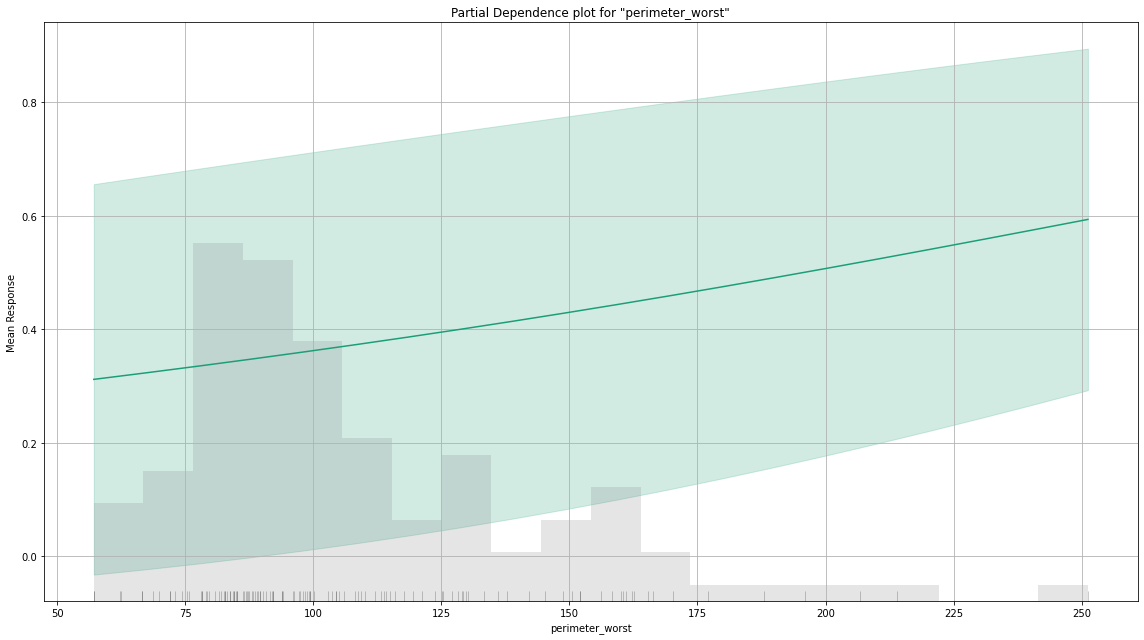

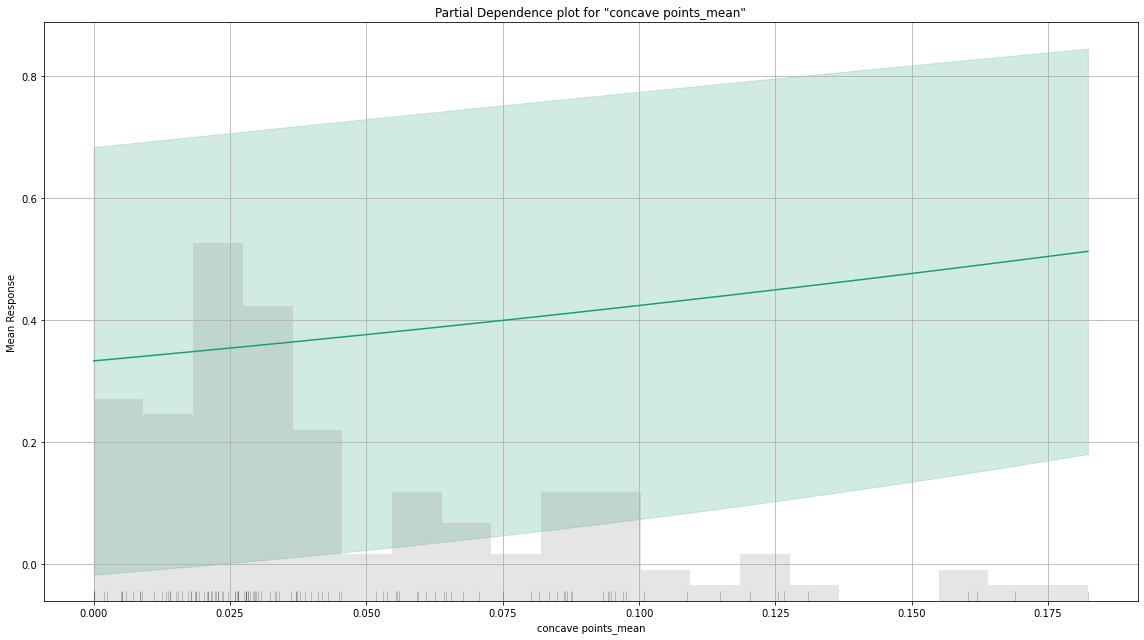

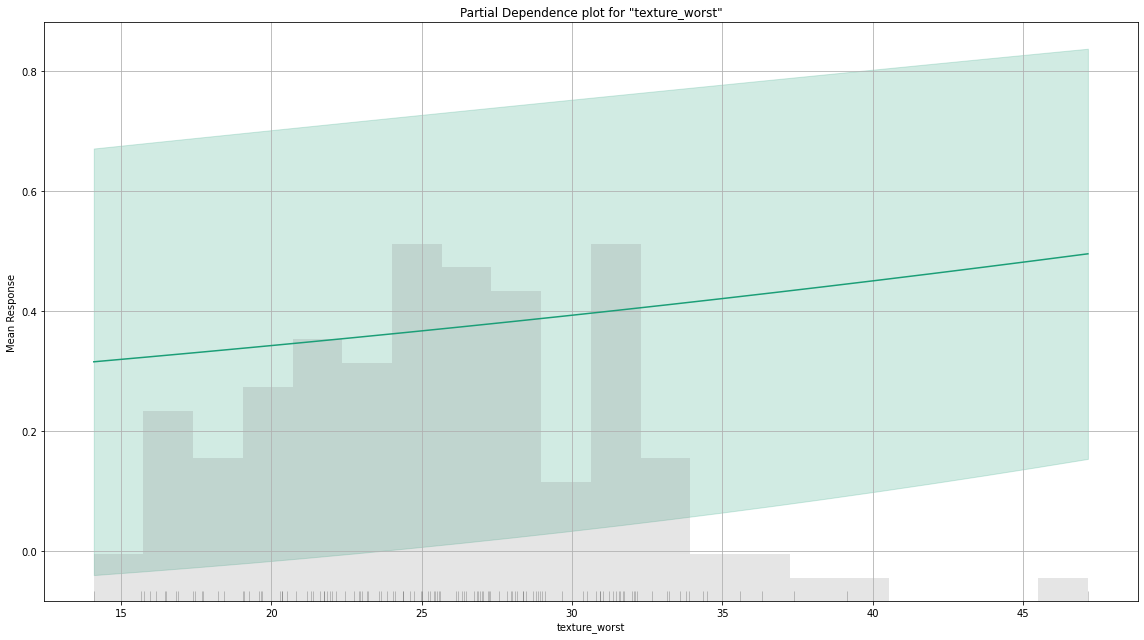

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## glm_fit1


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5027998526548495: 


,,B,M,Error,Rate
0,B,81.0,0.0,0.0,(0.0/81.0)
1,M,0.0,40.0,0.0,(0.0/40.0)
2,Total,81.0,40.0,0.0,(0.0/121.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

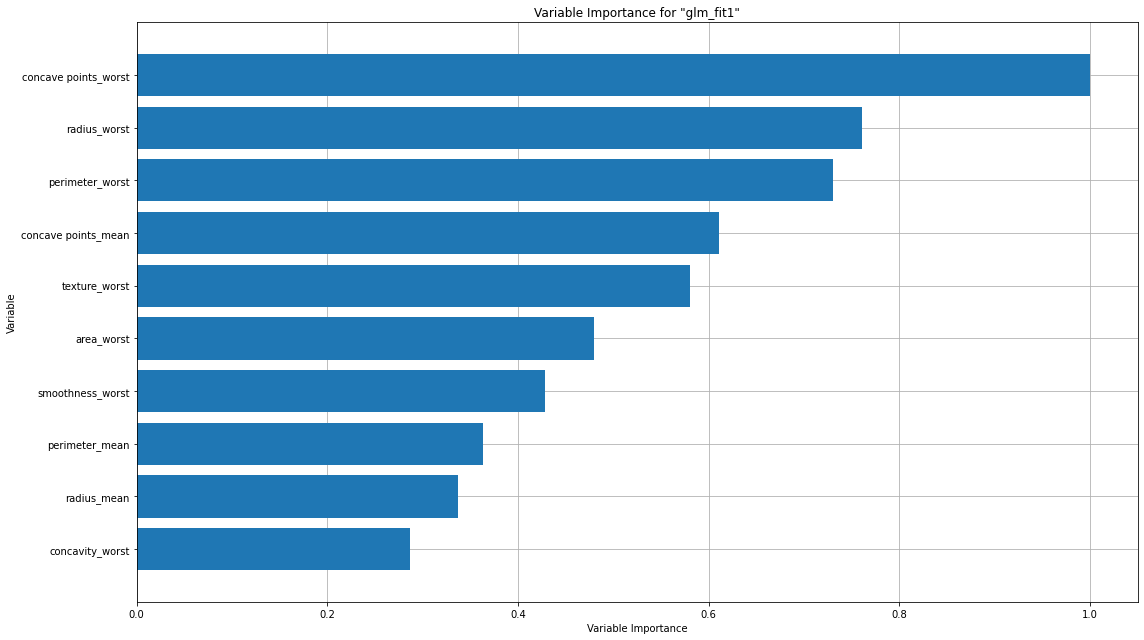

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

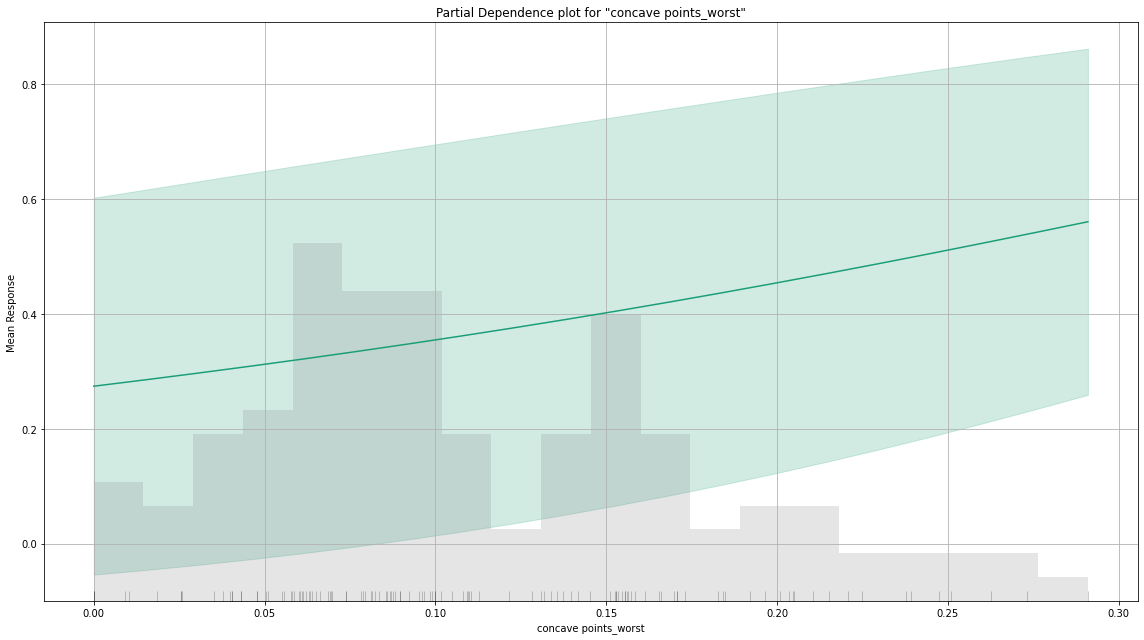

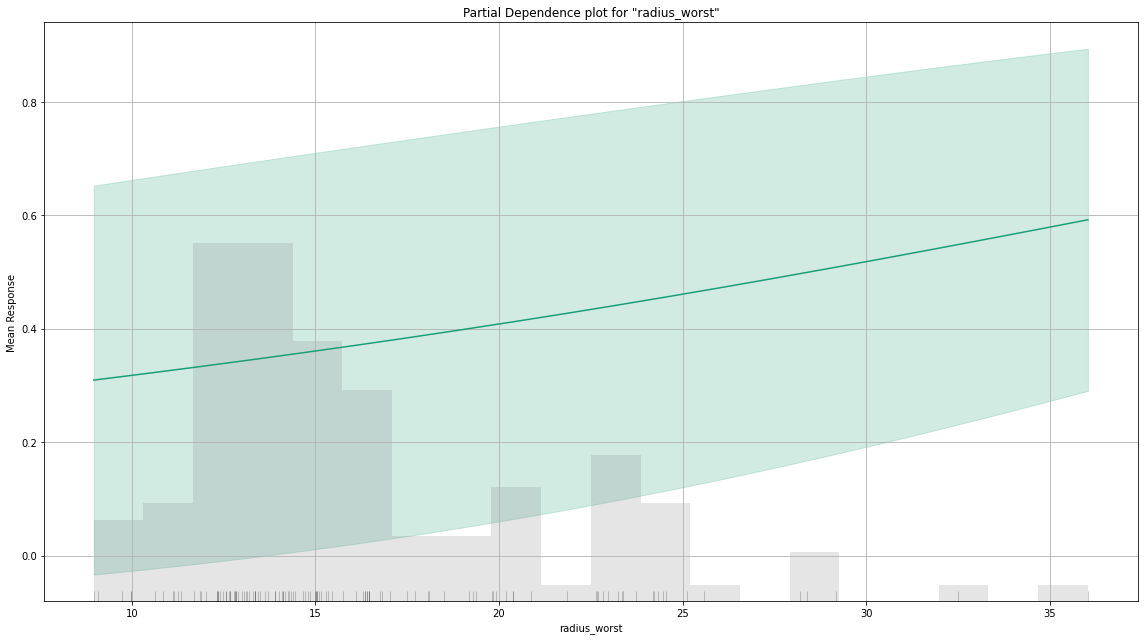

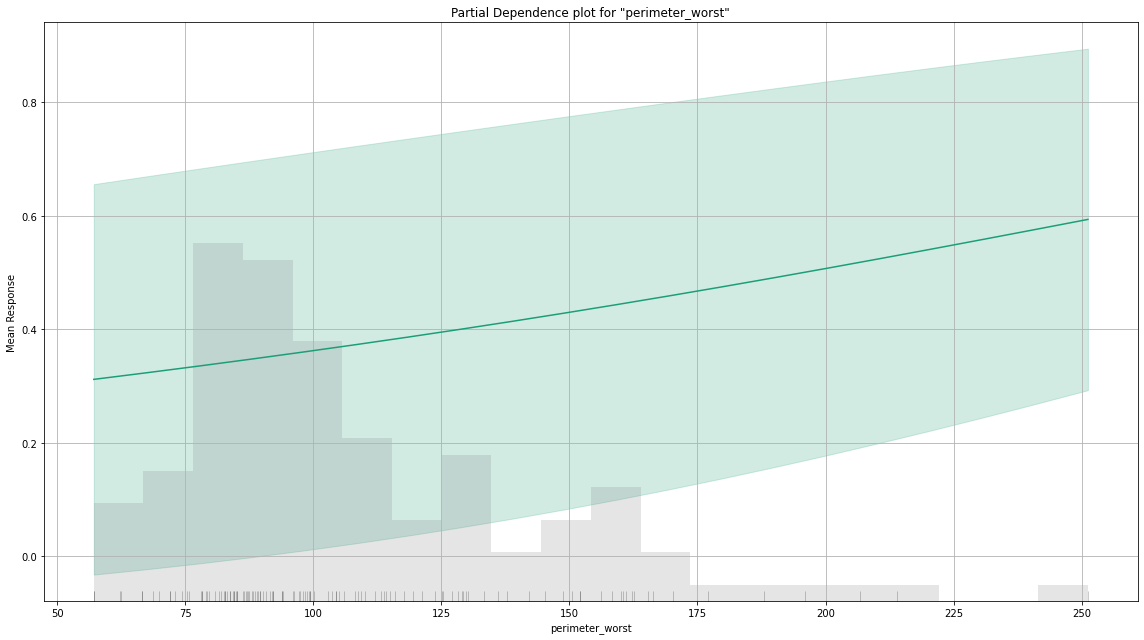

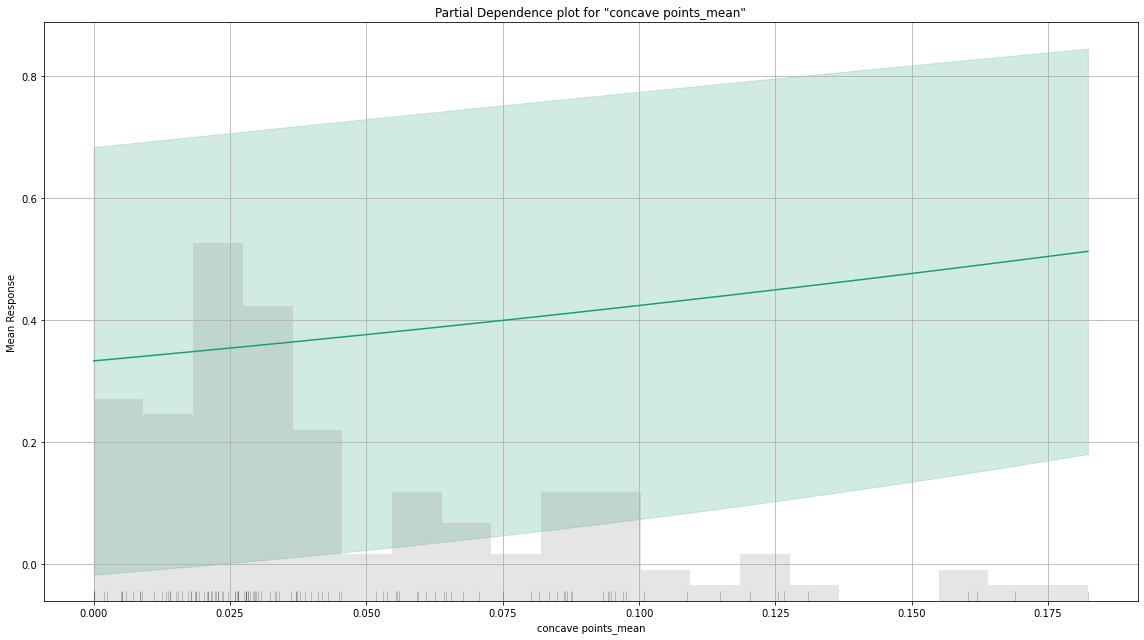

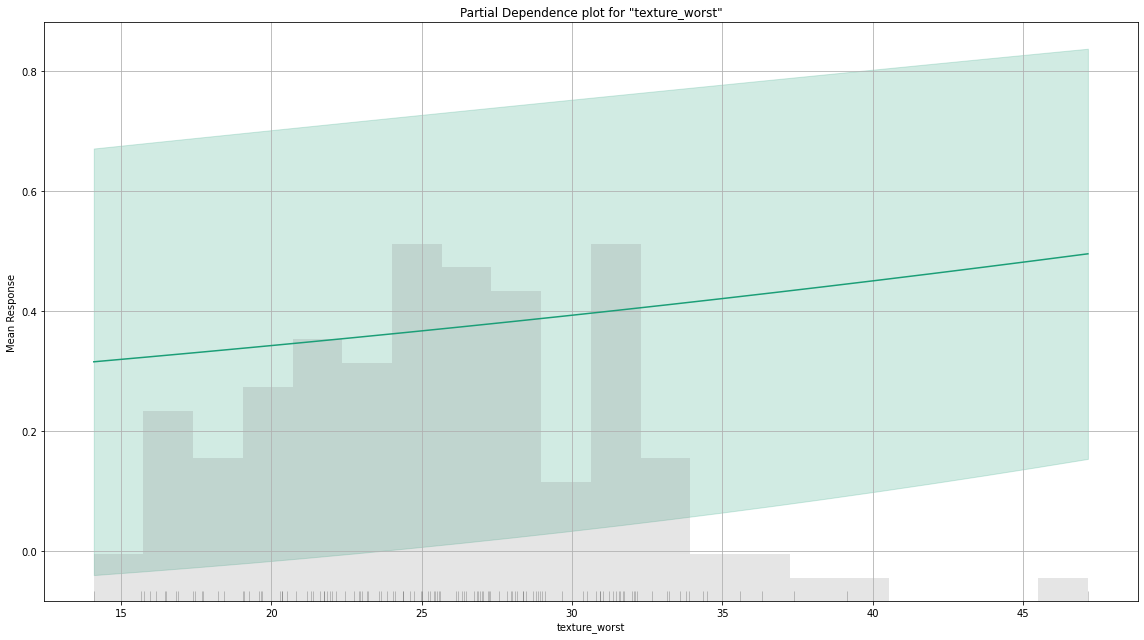

In [87]:
glm_fit1.explain(test)

In [29]:
glm_perf1 = glm_fit1.model_performance(test) 

In [89]:
glm_perf1.accuracy()

[[0.5027998526548495, 1.0]]

In [31]:
glm_perf1.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5027998526548495: 


,,B,M,Error,Rate
0,B,81.0,0.0,0.0,(0.0/81.0)
1,M,0.0,40.0,0.0,(0.0/40.0)
2,Total,81.0,40.0,0.0,(0.0/121.0)


### Predictions

In [132]:
def prediction(model, json_obj):
    '''
    Provided an H2O model and a dataframe with predictors, calculate predictions'''
    df = pd.DataFrame(data = json_obj)
    to_predict = h2o.H2OFrame(df)
    uploaded_model = model
    
    return uploaded_model.predict(to_predict).as_data_frame().to_json(orient='records')

In [133]:
prediction(glm_fit1, records_for_predictions)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


'[{"predict":"M","B":0.4470020381,"M":0.5529979619}]'

## Using A Family (Random Forest)

In [72]:
from h2o.estimators import H2ORandomForestEstimator

In [73]:
model = H2ORandomForestEstimator(ntrees=50, max_depth=20, nfolds=10)##10 fold CV

In [77]:
model.train(x=x,y=y,training_frame=train,validation_frame=valid)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1655325423370_9762


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,12591.0,5.0,8.0,6.18,10.0,21.0,15.44




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.03039566442429339
RMSE: 0.17434352418226892
LogLoss: 0.18068234127400357
Mean Per-Class Error: 0.031622516556291336
AUC: 0.9912527593818985
AUCPR: 0.989694767272854
Gini: 0.982505518763797

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4: 


,,B,M,Error,Rate
0,B,228.0,12.0,0.05,(12.0/240.0)
1,M,2.0,149.0,0.0132,(2.0/151.0)
2,Total,230.0,161.0,0.0358,(14.0/391.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.400000,0.955128,42.0
1,max f2,0.400000,0.973856,42.0
2,max f0point5,0.761905,0.962373,22.0
3,max accuracy,0.400000,0.964194,42.0
4,max precision,1.000000,1.000000,0.0
5,max recall,0.000000,1.000000,78.0
6,max specificity,1.000000,1.000000,0.0
7,max absolute_mcc,0.400000,0.926709,42.0
8,max min_per_class_accuracy,0.466667,0.958333,37.0
9,max mean_per_class_accuracy,0.400000,0.968377,42.0



Gains/Lift Table: Avg response rate: 38.62 %, avg score: 38.88 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.255754,1.000000,2.589404,2.589404,1.000000,1.000000,1.000000,1.000000,0.662252,0.662252,158.940397,158.940397,0.662252
1,2,0.301790,0.882353,2.589404,2.589404,1.000000,0.929400,1.000000,0.989230,0.119205,0.781457,158.940397,158.940397,0.781457
2,3,0.401535,0.444444,1.859059,2.407981,0.717949,0.676169,0.929936,0.911463,0.185430,0.966887,85.905926,140.798077,0.921054
3,4,0.511509,0.058824,0.240875,1.942053,0.093023,0.192505,0.750000,0.756887,0.026490,0.993377,-75.912521,94.205298,0.785044
4,5,1.000000,0.000000,0.013557,1.000000,0.005236,0.003312,0.386189,0.388773,0.006623,1.000000,-98.644291,0.000000,0.000000




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.06889824561403508
RMSE: 0.2624847531077473
LogLoss: 0.8082464613178151
Mean Per-Class Error: 0.0714285714285714
AUC: 0.933862433862434
AUCPR: 0.9367739495791012
Gini: 0.8677248677248679

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6799999999999999: 


,,B,M,Error,Rate
0,B,36.0,0.0,0.0,(0.0/36.0)
1,M,3.0,18.0,0.1429,(3.0/21.0)
2,Total,39.0,18.0,0.0526,(3.0/57.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.68,0.923077,5.0
1,max f2,0.68,0.882353,5.0
2,max f0point5,0.68,0.967742,5.0
3,max accuracy,0.68,0.947368,5.0
4,max precision,1.00,1.000000,0.0
5,max recall,0.00,1.000000,16.0
6,max specificity,1.00,1.000000,0.0
7,max absolute_mcc,0.68,0.889499,5.0
8,max min_per_class_accuracy,0.68,0.857143,5.0
9,max mean_per_class_accuracy,0.68,0.928571,5.0



Gains/Lift Table: Avg response rate: 36.84 %, avg score: 34.39 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.175439,1.00,2.714286,2.714286,1.000000,1.000000,1.000000,1.000000,0.476190,0.476190,171.428571,171.428571,0.476190
1,2,0.245614,0.96,2.714286,2.714286,1.000000,0.965000,1.000000,0.990000,0.190476,0.666667,171.428571,171.428571,0.666667
2,3,0.298246,0.70,2.714286,2.714286,1.000000,0.793333,1.000000,0.955294,0.142857,0.809524,171.428571,171.428571,0.809524
3,4,0.421053,0.24,0.387755,2.035714,0.142857,0.388571,0.750000,0.790000,0.047619,0.857143,-61.224490,103.571429,0.690476
4,5,0.543860,0.04,0.387755,1.663594,0.142857,0.080000,0.612903,0.629677,0.047619,0.904762,-61.224490,66.359447,0.571429
5,6,0.614035,0.02,0.678571,1.551020,0.250000,0.020000,0.571429,0.560000,0.047619,0.952381,-32.142857,55.102041,0.535714
6,7,1.000000,0.00,0.123377,1.000000,0.045455,0.000000,0.368421,0.343860,0.047619,1.000000,-87.662338,0.000000,0.000000




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.031297015028825856
RMSE: 0.1769096239010921
LogLoss: 0.10862169910685271
Mean Per-Class Error: 0.04155629139072847
AUC: 0.99344646799117
AUCPR: 0.9909430904105703
Gini: 0.98689293598234

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.64: 


,,B,M,Error,Rate
0,B,237.0,3.0,0.0125,(3.0/240.0)
1,M,13.0,138.0,0.0861,(13.0/151.0)
2,Total,250.0,141.0,0.0409,(16.0/391.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.64,0.945205,23.0
1,max f2,0.32,0.967532,37.0
2,max f0point5,0.68,0.972818,21.0
3,max accuracy,0.68,0.959079,21.0
4,max precision,1.00,1.000000,0.0
5,max recall,0.02,1.000000,52.0
6,max specificity,1.00,1.000000,0.0
7,max absolute_mcc,0.68,0.914882,21.0
8,max min_per_class_accuracy,0.50,0.953642,30.0
9,max mean_per_class_accuracy,0.46,0.958444,32.0



Gains/Lift Table: Avg response rate: 38.62 %, avg score: 38.93 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.161125,1.00,2.589404,2.589404,1.000000,1.000000,1.000000,1.000000,0.417219,0.417219,158.940397,158.940397,0.417219
1,2,0.217391,0.98,2.589404,2.589404,1.000000,0.986193,1.000000,0.996426,0.145695,0.562914,158.940397,158.940397,0.562914
2,3,0.309463,0.86,2.589404,2.589404,1.000000,0.931007,1.000000,0.976963,0.238411,0.801325,158.940397,158.940397,0.801325
3,4,0.401535,0.48,1.726269,2.391488,0.666667,0.655541,0.923567,0.903261,0.158940,0.960265,72.626932,139.148775,0.910265
4,5,0.508951,0.08,0.308262,1.951812,0.119048,0.220476,0.753769,0.759156,0.033113,0.993377,-69.173762,95.181204,0.789211
5,6,0.608696,0.02,0.066395,1.642857,0.025641,0.029744,0.634454,0.639630,0.006623,1.000000,-93.360503,64.285714,0.637500
6,7,1.000000,0.00,0.000000,1.000000,0.000000,0.000000,0.386189,0.389340,0.000000,1.000000,-100.000000,0.000000,0.000000




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,accuracy,0.976746,0.015191,0.972973,1.000000,0.964286,0.980392,0.975610,0.978261,1.000000,0.972222,0.948718,0.975000
1,auc,0.993676,0.007499,0.996667,1.000000,0.974359,0.996711,0.992823,0.996154,1.000000,0.992308,0.990260,0.997475
2,err,0.023254,0.015191,0.027027,0.000000,0.035714,0.019608,0.024390,0.021739,0.000000,0.027778,0.051282,0.025000
3,err_count,0.900000,0.567646,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000
4,f0point5,0.963998,0.037792,0.937500,1.000000,0.983607,0.959596,0.989011,0.961538,1.000000,0.978261,0.873016,0.957447
5,f1,0.967995,0.024460,0.960000,1.000000,0.960000,0.974359,0.972973,0.975610,1.000000,0.947368,0.916667,0.972973
6,f2,0.973053,0.027782,0.983607,1.000000,0.937500,0.989583,0.957447,0.990099,1.000000,0.918367,0.964912,0.989011
7,lift_top_group,2.678542,0.549132,3.083333,2.500000,2.153846,2.684210,2.157895,2.300000,2.538461,3.600000,3.545454,2.222222
8,logloss,0.112786,0.048699,0.082012,0.071795,0.238955,0.078858,0.127312,0.104359,0.077604,0.123210,0.114804,0.108955
9,max_per_class_error,0.045615,0.031805,0.040000,0.000000,0.076923,0.031250,0.052632,0.038462,0.000000,0.100000,0.071429,0.045455



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-06-16 21:31:10,7.659 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2022-06-16 21:31:10,7.691 sec,1.0,0.312893,3.381419,0.910877,0.788563,2.089694,0.097902,0.374634,4.847548,0.849206,0.753980,2.197279,0.140351
2,,2022-06-16 21:31:10,7.713 sec,2.0,0.270695,2.393935,0.933862,0.845728,2.232245,0.073276,0.310630,2.496737,0.888889,0.904609,2.714286,0.070175
3,,2022-06-16 21:31:10,7.727 sec,3.0,0.248929,1.838546,0.943847,0.892285,2.365321,0.066434,0.309058,2.507068,0.882275,0.898595,2.714286,0.087719
4,,2022-06-16 21:31:10,7.740 sec,4.0,0.248242,1.735220,0.943612,0.902899,2.406083,0.073846,0.296174,1.926123,0.902116,0.913112,2.714286,0.070175
5,,2022-06-16 21:31:10,7.756 sec,5.0,0.227692,1.239661,0.957141,0.933165,2.479683,0.063218,0.277836,1.902204,0.907407,0.920173,2.714286,0.070175
6,,2022-06-16 21:31:10,7.768 sec,6.0,0.209059,0.914551,0.968317,0.948918,2.504505,0.055402,0.275723,1.898759,0.909392,0.923359,2.714286,0.070175
7,,2022-06-16 21:31:10,7.788 sec,7.0,0.203943,0.714825,0.972383,0.962341,2.545516,0.056452,0.274204,1.896578,0.910053,0.924569,2.714286,0.070175
8,,2022-06-16 21:31:10,7.803 sec,8.0,0.199789,0.531726,0.976659,0.977687,2.589404,0.052770,0.277540,1.899646,0.910053,0.924569,2.714286,0.070175
9,,2022-06-16 21:31:10,7.815 sec,9.0,0.202545,0.532857,0.976438,0.977520,2.589404,0.054974,0.273753,1.897857,0.910714,0.925868,2.714286,0.052632



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,perimeter_worst,860.237732,1.000000,0.213289
1,area_worst,685.526428,0.796903,0.169971
2,concave points_worst,626.715393,0.728537,0.155389
3,concave points_mean,420.529297,0.488852,0.104267
4,radius_worst,405.366516,0.471226,0.100507
5,perimeter_mean,191.318817,0.222402,0.047436
6,concavity_mean,137.124756,0.159403,0.033999
7,compactness_worst,84.226883,0.097911,0.020883
8,concavity_worst,83.187340,0.096703,0.020626
9,area_mean,69.589317,0.080895,0.017254



See the whole table with table.as_data_frame()


In [79]:
rf_perf1 = model.model_performance(test) ##see hpw the model performs on 20%
##unseen data

In [80]:
rf_perf1


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.02082644628099174
RMSE: 0.14431370787625042
LogLoss: 0.0739706796515878
Mean Per-Class Error: 0.012345679012345734
AUC: 0.9992283950617284
AUCPR: 0.9984772798380902
Gini: 0.9984567901234569

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6: 


,,B,M,Error,Rate
0,B,79.0,2.0,0.0247,(2.0/81.0)
1,M,0.0,40.0,0.0,(0.0/40.0)
2,Total,79.0,42.0,0.0165,(2.0/121.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.6,0.975610,9.0
1,max f2,0.6,0.990099,9.0
2,max f0point5,0.7,0.989583,6.0
3,max accuracy,0.7,0.983471,6.0
4,max precision,1.0,1.000000,0.0
5,max recall,0.6,1.000000,9.0
6,max specificity,1.0,1.000000,0.0
7,max absolute_mcc,0.6,0.963777,9.0
8,max min_per_class_accuracy,0.6,0.975309,9.0
9,max mean_per_class_accuracy,0.6,0.987654,9.0



Gains/Lift Table: Avg response rate: 33.06 %, avg score: 36.40 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.223140,1.00,3.025000,3.025000,1.000000,1.000000,1.000000,1.000000,0.675,0.675,202.500000,202.50000,0.675000
1,2,0.305785,0.90,3.025000,3.025000,1.000000,0.954000,1.000000,0.987568,0.250,0.925,202.500000,202.50000,0.925000
2,3,0.413223,0.26,0.698077,2.420000,0.230769,0.475385,0.800000,0.854400,0.075,1.000,-30.192308,142.00000,0.876543
3,4,0.512397,0.04,0.000000,1.951613,0.000000,0.096667,0.645161,0.707742,0.000,1.000,-100.000000,95.16129,0.728395
4,5,1.000000,0.00,0.000000,1.000000,0.000000,0.002712,0.330579,0.363967,0.000,1.000,-100.000000,0.00000,0.000000


In [81]:
rf_perf1.accuracy() ##overall accuracy

[[0.7, 0.9834710743801653]]

In [82]:
model.accuracy(train=True, valid=True, xval=False)

{'train': [[0.4, 0.9641943734015346]],
 'valid': [[0.6799999999999999, 0.9473684210526315]]}

In [83]:
test_rf_binary = model.predict(test)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [84]:
test_rf_binary.head(5)

predict,B,M
M,0.3,0.7
M,0.1,0.9
M,0.04,0.96
M,0,1
M,0.04,0.96


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DRF_model_python_1655325423370_9762


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6: 


,,B,M,Error,Rate
0,B,79.0,2.0,0.0247,(2.0/81.0)
1,M,0.0,40.0,0.0,(0.0/40.0)
2,Total,79.0,42.0,0.0165,(2.0/121.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

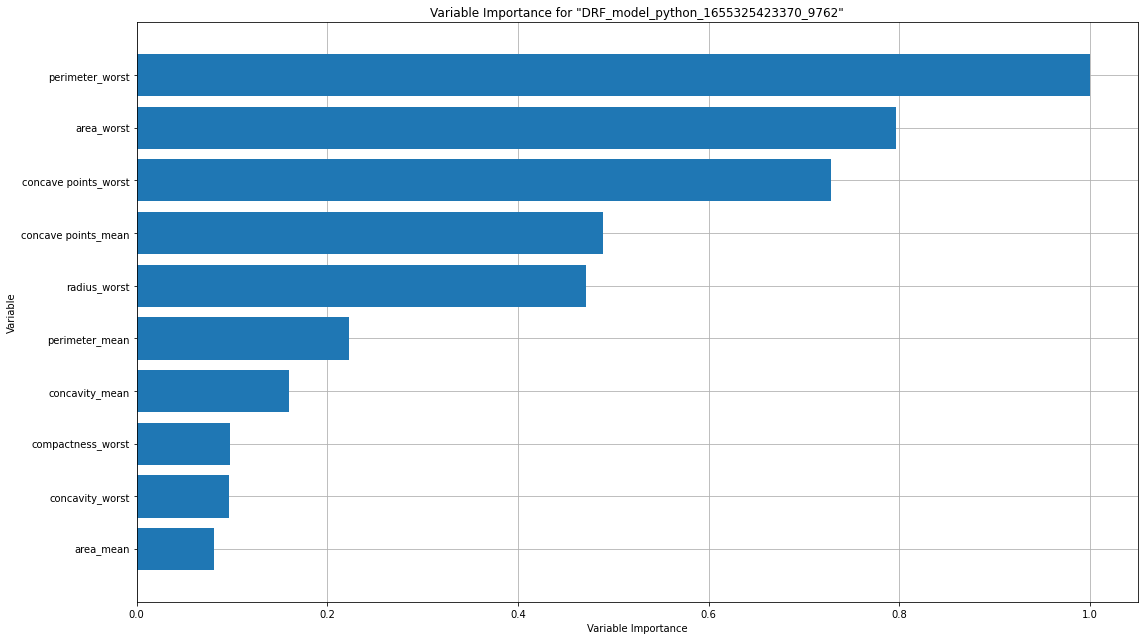

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

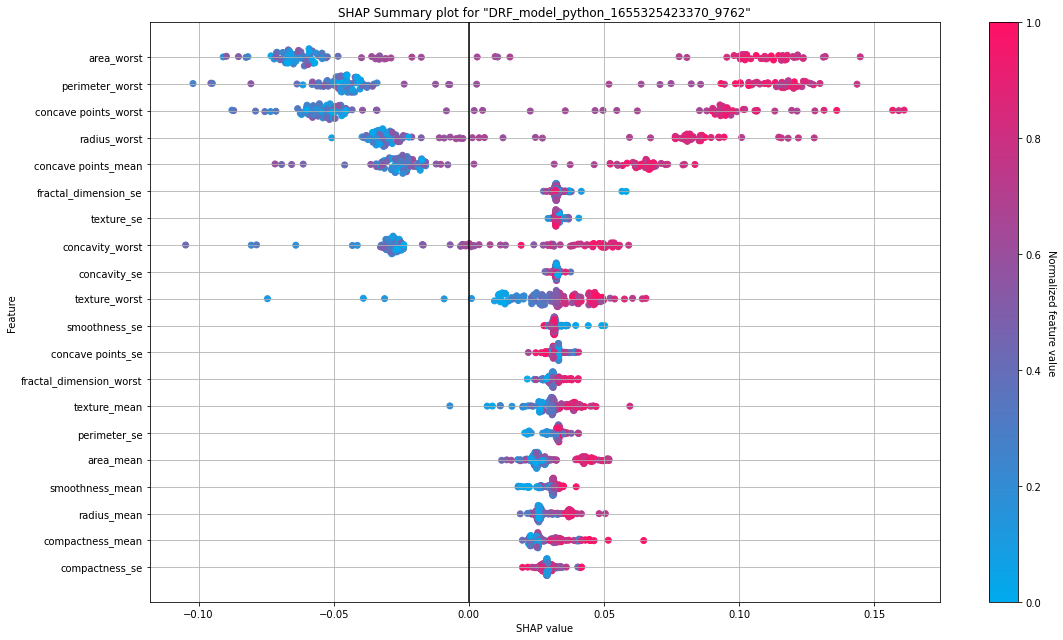

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

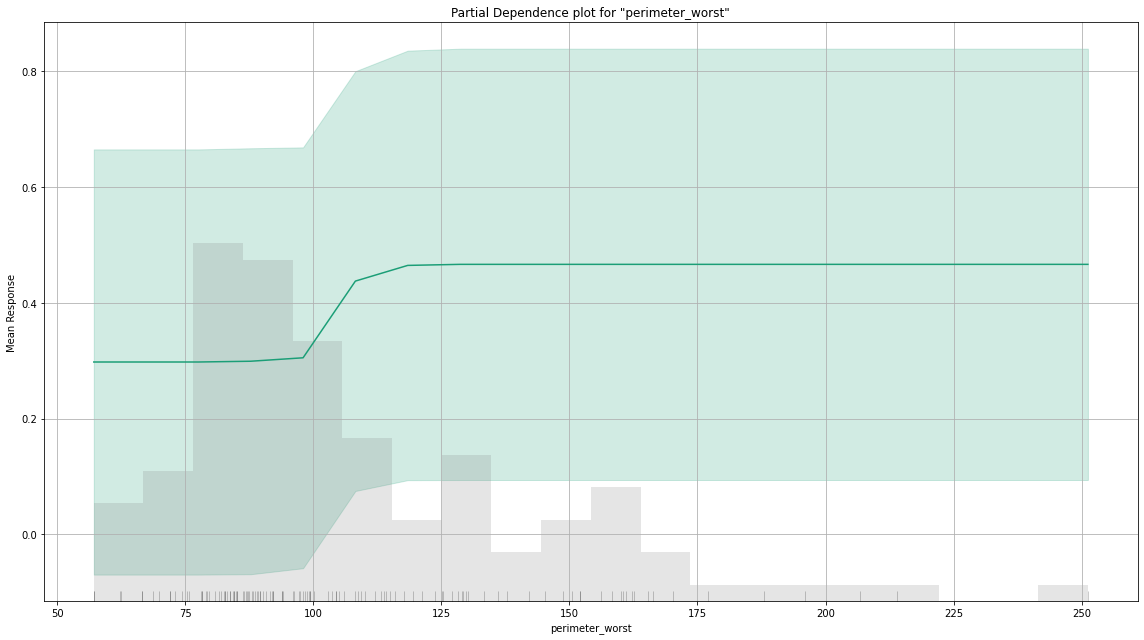

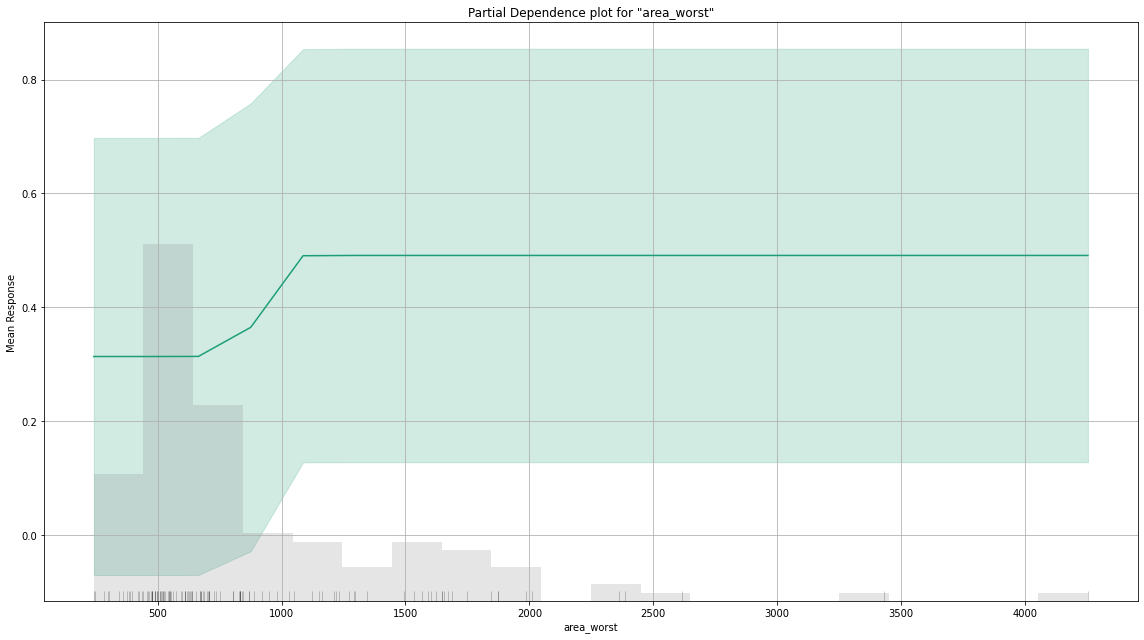

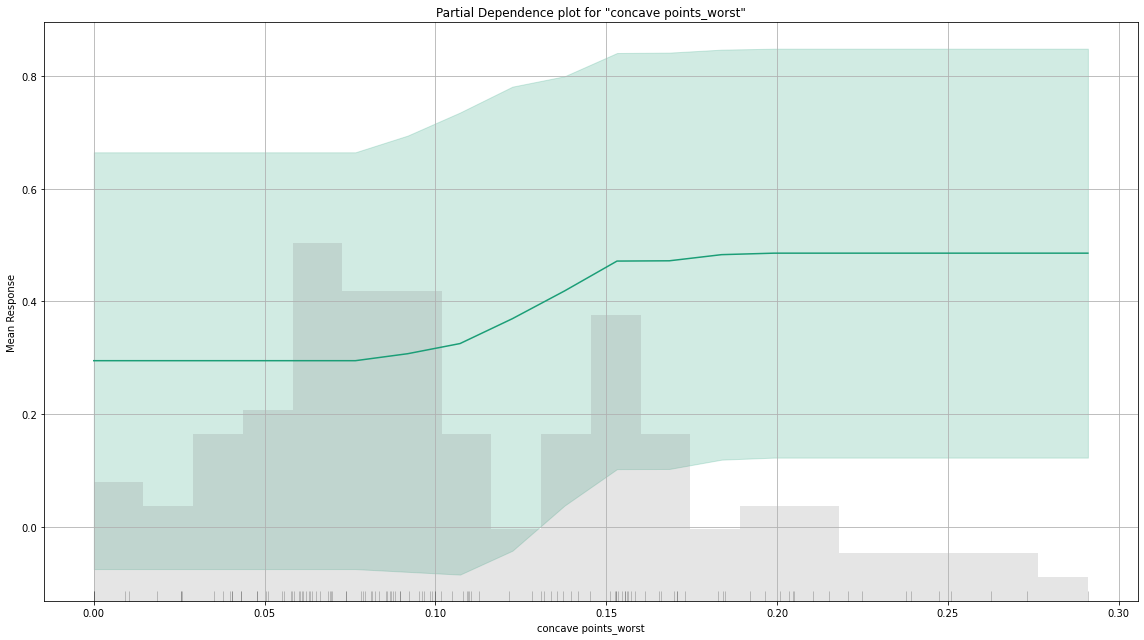

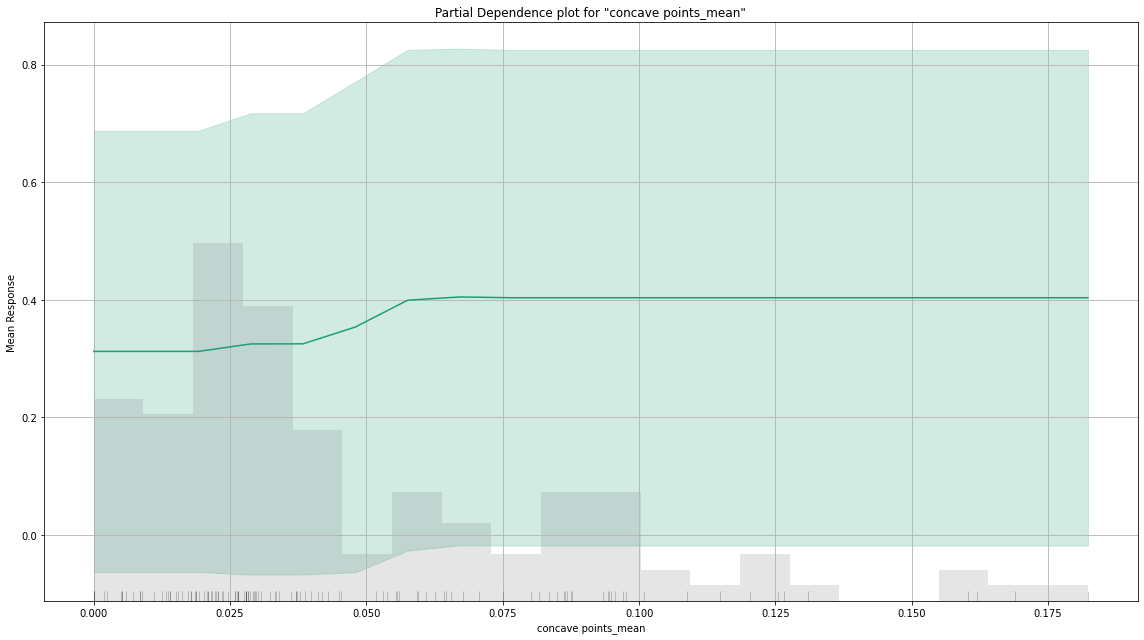

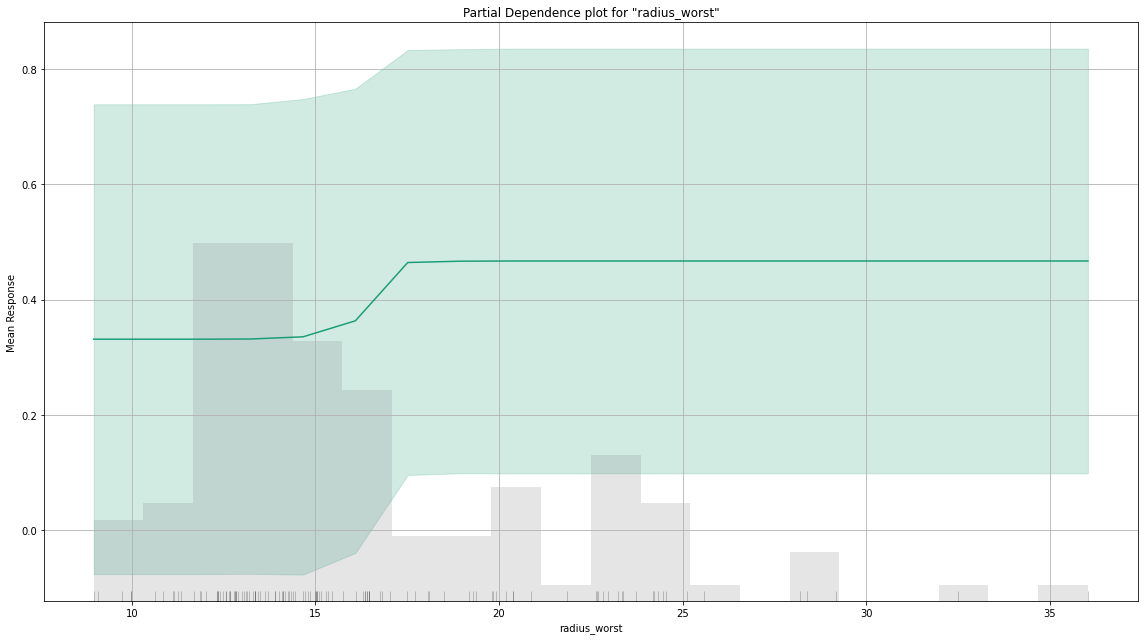

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DRF_model_python_1655325423370_9762


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6: 


,,B,M,Error,Rate
0,B,79.0,2.0,0.0247,(2.0/81.0)
1,M,0.0,40.0,0.0,(0.0/40.0)
2,Total,79.0,42.0,0.0165,(2.0/121.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

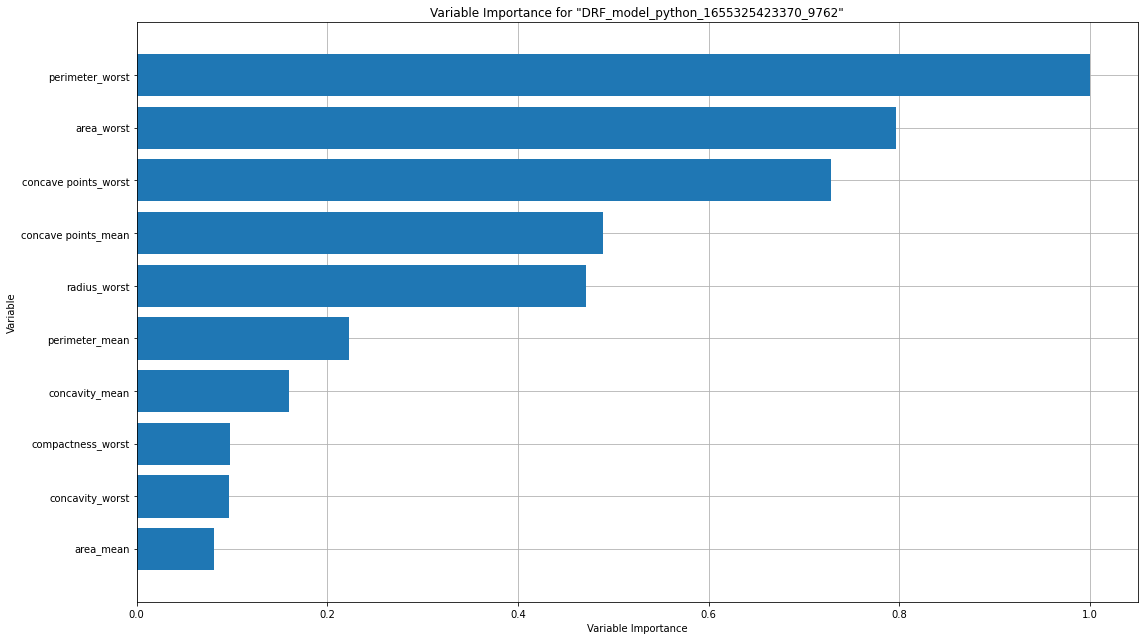

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

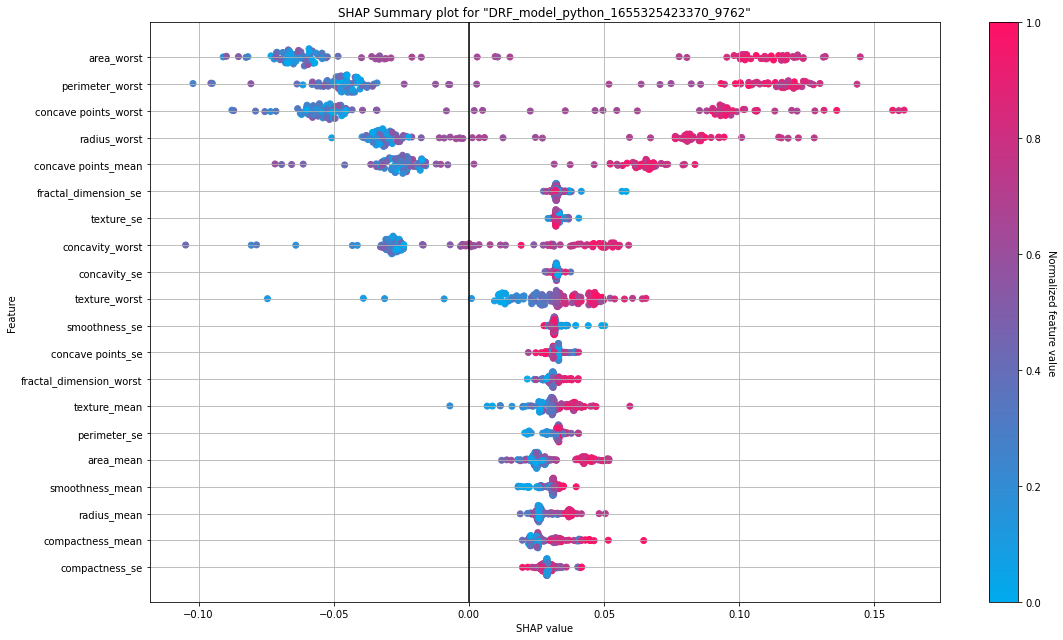

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

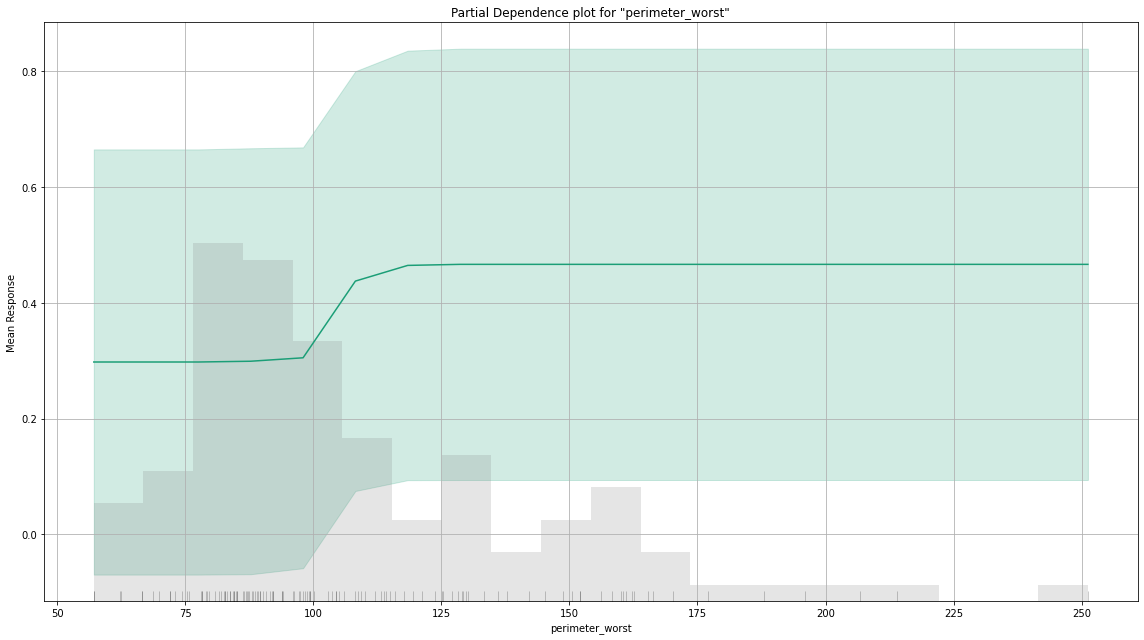

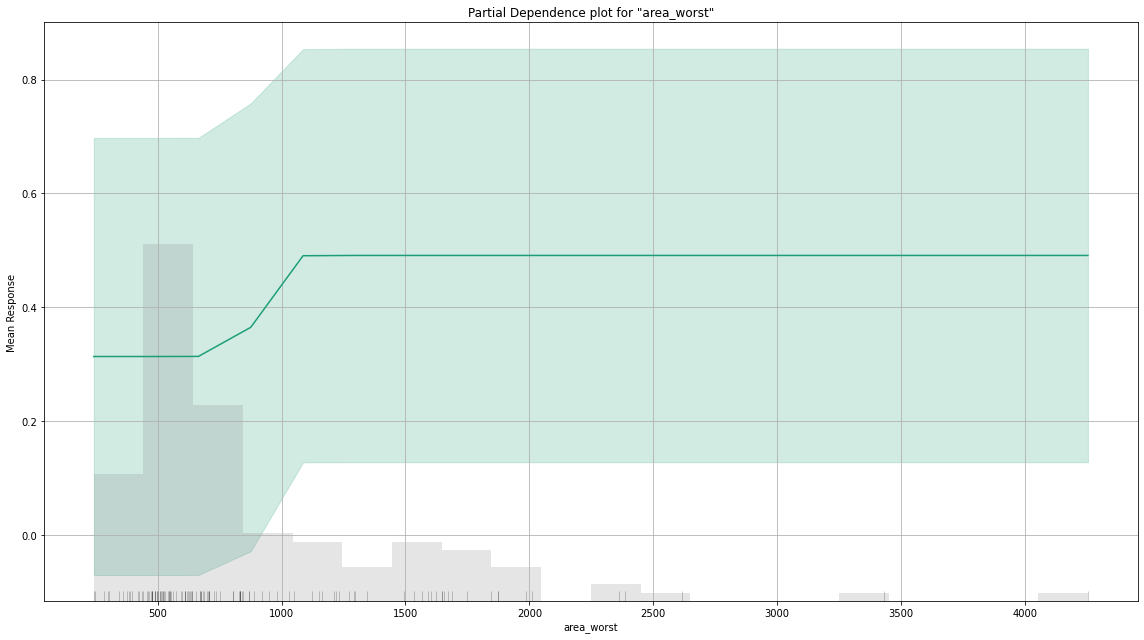

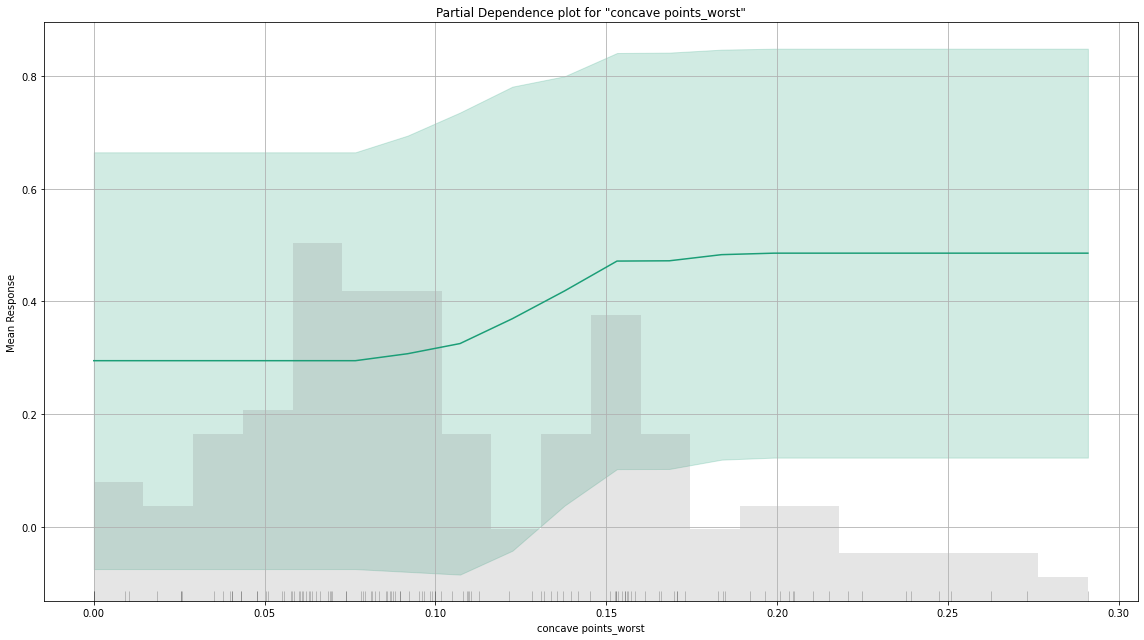

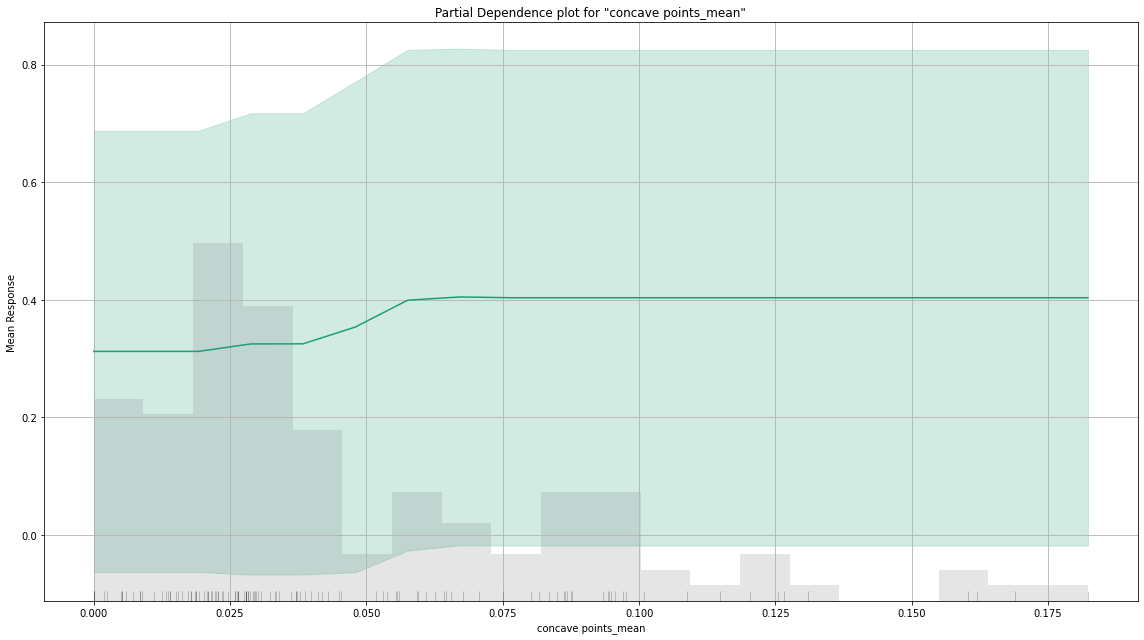

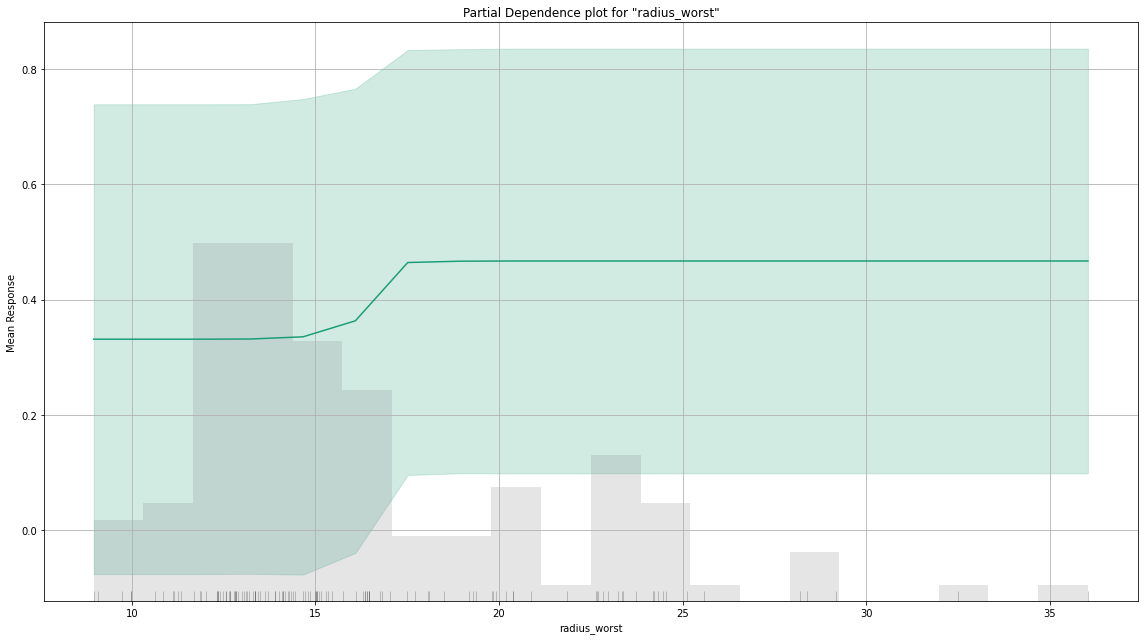

In [86]:
model.explain(test)

## Example 2 - Using Grid Search

In [32]:
from h2o.grid.grid_search import H2OGridSearch

In [33]:
params = {
   'alpha': [x * 0.01 for x in range(0,99)]
}

### Cartesian Grid Search: 
>The default grid search method in H2o, exhaustively searches over all possible combinations of the hyperparameters. If the search space is small, this should be your method of choice. 

In [35]:
h20_grid = H2OGridSearch(
model = H2OGeneralizedLinearEstimator(family = 'binomial'),
hyper_params = params, 
search_criteria = {'strategy': "Cartesian"},
grid_id = 'glm_grid1'
)

In [36]:
h20_grid.train(
x = x,
y = y,
training_frame= train,
validation_frame=valid, 
lambda_search = True # model parameter than we want to prefix! 
)



glm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


/Users/massimo/Dropbox/Personal Development/myenv01/myenv01/lib/python3.7/site-packages/h2o/grid/grid_search.py:423: UserWarning: Adding alpha array to hyperparameter runs slower with gridsearch.  This is due to the fact that the algo has to run initialization for every alpha value.  Setting the alpha array as a model parameter will skip the initialization and run faster overall.
  warnings.warn(w_message);


       alpha           model_ids   logloss
0       0.00   glm_grid1_model_1  0.215927
1       0.10  glm_grid1_model_11  0.222736
2       0.09  glm_grid1_model_10  0.222764
3       0.11  glm_grid1_model_12  0.222894
4       0.08   glm_grid1_model_9  0.223045
.. ..    ...                 ...       ...
94      0.94  glm_grid1_model_95  0.274884
95      0.95  glm_grid1_model_96  0.275402
96      0.96  glm_grid1_model_97  0.275965
97      0.97  glm_grid1_model_98  0.276553
98      0.98  glm_grid1_model_99  0.277120

[99 rows x 4 columns]


In [37]:
glm_gridperf1 =h20_grid.get_grid(sort_by='auc', decreasing=True)
glm_gridperf1

       alpha           model_ids       auc
0       0.00   glm_grid1_model_1  0.966931
1       0.12  glm_grid1_model_13  0.961640
2       0.13  glm_grid1_model_14  0.961640
3       0.14  glm_grid1_model_15  0.961640
4       0.10  glm_grid1_model_11  0.960317
.. ..    ...                 ...       ...
94      0.86  glm_grid1_model_87  0.929894
95      0.95  glm_grid1_model_96  0.929894
96      0.96  glm_grid1_model_97  0.928571
97      0.97  glm_grid1_model_98  0.928571
98      0.98  glm_grid1_model_99  0.928571

[99 rows x 4 columns]


In [38]:
best_glm1 = glm_gridperf1.models[0]
best_glm1

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  glm_grid1_model_1


GLM Model: summary


,,family,link,regularization,lambda_search,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,Ridge ( lambda = 0.03633 ),"nlambda = 30, lambda.max = 39.327, lambda.min = 0.03633, lambda.1s...",30,30,46,py_4_sid_b729




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.021351371663590826
RMSE: 0.14612108562281773
LogLoss: 0.09068535301934688
Null degrees of freedom: 390
Residual degrees of freedom: 360
Null deviance: 521.6041179862931
Residual deviance: 70.91594606112928
AIC: 132.91594606112926
AUC: 0.9983167770419427
AUCPR: 0.9975324970537995
Gini: 0.9966335540838853

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.39584259724760823: 


,,B,M,Error,Rate
0,B,238.0,2.0,0.0083,(2.0/240.0)
1,M,3.0,148.0,0.0199,(3.0/151.0)
2,Total,241.0,150.0,0.0128,(5.0/391.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.395843,0.983389,147.0
1,max f2,0.395843,0.981432,147.0
2,max f0point5,0.506641,0.989233,145.0
3,max accuracy,0.506641,0.987212,145.0
4,max precision,1.000000,1.000000,0.0
5,max recall,0.173132,1.000000,175.0
6,max specificity,1.000000,1.000000,0.0
7,max absolute_mcc,0.506641,0.973056,145.0
8,max min_per_class_accuracy,0.395843,0.980132,147.0
9,max mean_per_class_accuracy,0.395843,0.985900,147.0



Gains/Lift Table: Avg response rate: 38.62 %, avg score: 38.62 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010230,0.999998,2.589404,2.589404,1.000000,1.000000,1.000000,1.000000,0.026490,0.026490,158.940397,158.940397,0.026490
1,2,0.020460,0.999989,2.589404,2.589404,1.000000,0.999995,1.000000,0.999997,0.026490,0.052980,158.940397,158.940397,0.052980
2,3,0.030691,0.999961,2.589404,2.589404,1.000000,0.999975,1.000000,0.999990,0.026490,0.079470,158.940397,158.940397,0.079470
3,4,0.040921,0.999887,2.589404,2.589404,1.000000,0.999936,1.000000,0.999976,0.026490,0.105960,158.940397,158.940397,0.105960
4,5,0.051151,0.999825,2.589404,2.589404,1.000000,0.999868,1.000000,0.999955,0.026490,0.132450,158.940397,158.940397,0.132450
5,6,0.102302,0.998899,2.589404,2.589404,1.000000,0.999334,1.000000,0.999644,0.132450,0.264901,158.940397,158.940397,0.264901
6,7,0.150895,0.992169,2.589404,2.589404,1.000000,0.996165,1.000000,0.998524,0.125828,0.390728,158.940397,158.940397,0.390728
7,8,0.202046,0.981063,2.589404,2.589404,1.000000,0.987027,1.000000,0.995613,0.132450,0.523179,158.940397,158.940397,0.523179
8,9,0.301790,0.886333,2.589404,2.589404,1.000000,0.940745,1.000000,0.977479,0.258278,0.781457,158.940397,158.940397,0.781457
9,10,0.401535,0.298985,1.991849,2.440967,0.769231,0.616460,0.942675,0.887799,0.198675,0.980132,99.184921,144.096680,0.942632




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.05979309491723039
RMSE: 0.24452626631351976
LogLoss: 0.21592729405106648
Null degrees of freedom: 56
Residual degrees of freedom: 26
Null deviance: 75.10090621148149
Residual deviance: 24.61571152182158
AIC: 86.61571152182158
AUC: 0.966931216931217
AUCPR: 0.9640974435086341
Gini: 0.933862433862434

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5281652571422272: 


,,B,M,Error,Rate
0,B,36.0,0.0,0.0,(0.0/36.0)
1,M,3.0,18.0,0.1429,(3.0/21.0)
2,Total,39.0,18.0,0.0526,(3.0/57.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.528165,0.923077,17.0
1,max f2,0.158847,0.934579,22.0
2,max f0point5,0.528165,0.967742,17.0
3,max accuracy,0.528165,0.947368,17.0
4,max precision,0.999997,1.000000,0.0
5,max recall,0.017205,1.000000,39.0
6,max specificity,0.999997,1.000000,0.0
7,max absolute_mcc,0.528165,0.889499,17.0
8,max min_per_class_accuracy,0.158847,0.916667,22.0
9,max mean_per_class_accuracy,0.158847,0.934524,22.0



Gains/Lift Table: Avg response rate: 36.84 %, avg score: 33.79 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.017544,0.999919,2.714286,2.714286,1.000000,0.999997,1.000000,0.999997,0.047619,0.047619,171.428571,171.428571,0.047619
1,2,0.035088,0.999858,2.714286,2.714286,1.000000,0.999858,1.000000,0.999928,0.047619,0.095238,171.428571,171.428571,0.095238
2,3,0.035088,0.999856,0.000000,2.714286,0.000000,0.000000,1.000000,0.999928,0.000000,0.095238,-100.000000,171.428571,0.095238
3,4,0.052632,0.999827,2.714286,2.714286,1.000000,0.999855,1.000000,0.999903,0.047619,0.142857,171.428571,171.428571,0.142857
4,5,0.052632,0.999761,0.000000,2.714286,0.000000,0.000000,1.000000,0.999903,0.000000,0.142857,-100.000000,171.428571,0.142857
5,6,0.105263,0.998892,2.714286,2.714286,1.000000,0.999383,1.000000,0.999643,0.142857,0.285714,171.428571,171.428571,0.285714
6,7,0.157895,0.992255,2.714286,2.714286,1.000000,0.996859,1.000000,0.998715,0.142857,0.428571,171.428571,171.428571,0.428571
7,8,0.210526,0.979711,2.714286,2.714286,1.000000,0.984231,1.000000,0.995094,0.142857,0.571429,171.428571,171.428571,0.571429
8,9,0.298246,0.548886,2.714286,2.714286,1.000000,0.802003,1.000000,0.938303,0.238095,0.809524,171.428571,171.428571,0.809524
9,10,0.403509,0.157475,1.357143,2.360248,0.500000,0.324307,0.869565,0.778130,0.142857,0.952381,35.714286,136.024845,0.869048




Scoring History: 


,,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test,alpha,iterations,...,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-06-15 22:05:30,0.000 sec,2,.39E2,31,1.243671,1.233293,0.0,NaN,...,,,,,,,,,,
1,,2022-06-15 22:05:30,0.028 sec,4,.29E2,31,1.214612,1.206253,0.0,NaN,...,,,,,,,,,,
2,,2022-06-15 22:05:30,0.040 sec,6,.21E2,31,1.178127,1.172361,0.0,NaN,...,,,,,,,,,,
3,,2022-06-15 22:05:30,0.061 sec,8,.15E2,31,1.133530,1.131046,0.0,NaN,...,,,,,,,,,,
4,,2022-06-15 22:05:30,0.070 sec,10,.11E2,31,1.080889,1.082455,0.0,NaN,...,,,,,,,,,,
5,,2022-06-15 22:05:30,0.084 sec,12,.8E1,31,1.020838,1.027362,0.0,NaN,...,,,,,,,,,,
6,,2022-06-15 22:05:30,0.097 sec,14,.58E1,31,0.955068,0.967546,0.0,NaN,...,,,,,,,,,,
7,,2022-06-15 22:05:30,0.110 sec,16,.43E1,31,0.885430,0.905033,0.0,NaN,...,,,,,,,,,,
8,,2022-06-15 22:05:30,0.121 sec,18,.31E1,31,0.814511,0.842535,0.0,NaN,...,,,,,,,,,,
9,,2022-06-15 22:05:30,0.130 sec,20,.23E1,31,0.743794,0.781722,0.0,NaN,...,,,,,,,,,,



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,texture_worst,0.510673,1.000000,0.066816
1,concave points_worst,0.489138,0.957829,0.063998
2,radius_worst,0.456341,0.893607,0.059707
3,perimeter_worst,0.439909,0.861430,0.057557
4,area_worst,0.410139,0.803135,0.053662
5,smoothness_worst,0.398777,0.780884,0.052176
6,concave points_mean,0.369692,0.723931,0.048370
7,radius_mean,0.338838,0.663512,0.044333
8,perimeter_mean,0.337128,0.660163,0.044110
9,concavity_worst,0.332246,0.650603,0.043471



See the whole table with table.as_data_frame()


In [39]:
best_glm1.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.39584259724760823: 


,,B,M,Error,Rate
0,B,238.0,2.0,0.0083,(2.0/240.0)
1,M,3.0,148.0,0.0199,(3.0/151.0)
2,Total,241.0,150.0,0.0128,(5.0/391.0)


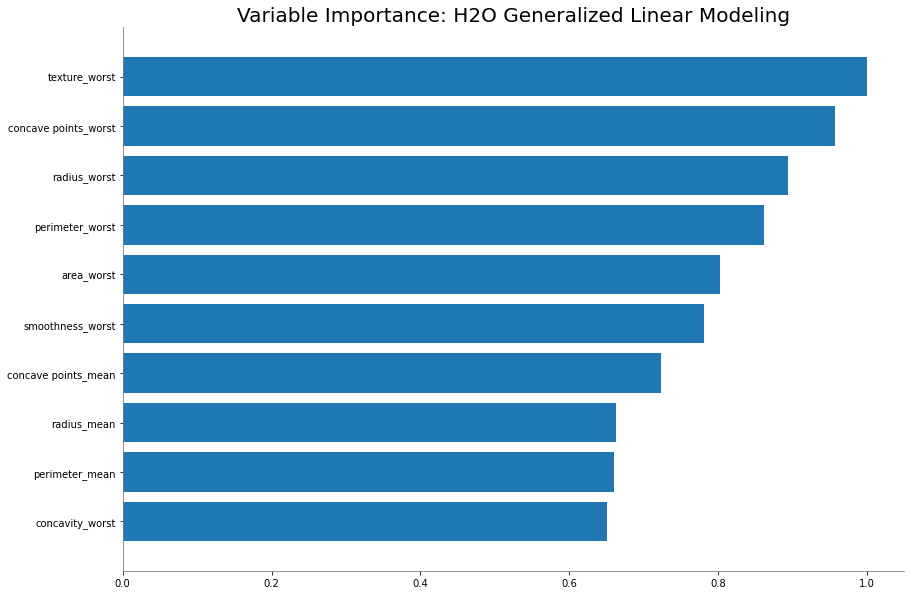

In [40]:
best_glm1.varimp_plot()

### Random Grid Search

>As the name suggests, a random combination of hyperparameters (sampled uniformly from the set of all possible hyperparameter value combinations) are tested instead of exhaustively testing all possible combinations. In addition, a stopping criterion is also set to specify when the random search must be stopped.

In [41]:
params = {
   'alpha': [x * 0.01 for x in range(0,99)]
}

In [42]:
search_criteria = {'strategy': 'RandomDiscrete',
                  'max_models': 30 # max of 30 models assessed
                  }

In [43]:
h2o_grid2 = H2OGridSearch(
model = H2OGeneralizedLinearEstimator(family = 'binomial'),
hyper_params = params,
search_criteria = search_criteria,
grid_id = 'glm_grid2')

In [44]:
h2o_grid2.train(
x = x,
y = y,
training_frame= train,
validation_frame=valid, 
lambda_search = True # model parameter than we want to prefix! 
)

glm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


/Users/massimo/Dropbox/Personal Development/myenv01/myenv01/lib/python3.7/site-packages/h2o/grid/grid_search.py:423: UserWarning: Adding alpha array to hyperparameter runs slower with gridsearch.  This is due to the fact that the algo has to run initialization for every alpha value.  Setting the alpha array as a model parameter will skip the initialization and run faster overall.
  warnings.warn(w_message);


      alpha           model_ids   logloss
0      0.11  glm_grid2_model_28  0.222894
1      0.08  glm_grid2_model_21  0.223045
2      0.12  glm_grid2_model_20  0.223191
3      0.16   glm_grid2_model_4  0.225957
4      0.17  glm_grid2_model_25  0.226811
5      0.19  glm_grid2_model_17  0.228379
6      0.20  glm_grid2_model_10  0.229211
7      0.22  glm_grid2_model_19  0.230848
8      0.23  glm_grid2_model_12  0.231674
9      0.31  glm_grid2_model_18  0.238029
10     0.35  glm_grid2_model_24  0.241672
11     0.36   glm_grid2_model_7  0.242616
12     0.37   glm_grid2_model_2  0.243574
13     0.39  glm_grid2_model_29  0.245460
14     0.40  glm_grid2_model_26  0.246398
15     0.41  glm_grid2_model_16  0.247382
16     0.49  glm_grid2_model_27  0.255441
17     0.53   glm_grid2_model_1  0.258626
18     0.55   glm_grid2_model_5  0.259732
19     0.56  glm_grid2_model_23  0.260304
20     0.65   glm_grid2_model_8  0.265892
21     0.66  glm_grid2_model_30  0.266579
22     0.69  glm_grid2_model_15  0

In [45]:
glm_gridperf2 =h2o_grid2.get_grid(sort_by='auc', decreasing=True)
glm_gridperf2

      alpha           model_ids       auc
0      0.12  glm_grid2_model_20  0.961640
1      0.11  glm_grid2_model_28  0.960317
2      0.16   glm_grid2_model_4  0.960317
3      0.08  glm_grid2_model_21  0.958995
4      0.17  glm_grid2_model_25  0.958995
5      0.20  glm_grid2_model_10  0.955026
6      0.19  glm_grid2_model_17  0.955026
7      0.22  glm_grid2_model_19  0.952381
8      0.23  glm_grid2_model_12  0.949735
9      0.31  glm_grid2_model_18  0.948413
10     0.35  glm_grid2_model_24  0.947090
11     0.36   glm_grid2_model_7  0.947090
12     0.37   glm_grid2_model_2  0.945767
13     0.39  glm_grid2_model_29  0.943122
14     0.41  glm_grid2_model_16  0.941799
15     0.40  glm_grid2_model_26  0.941799
16     0.49  glm_grid2_model_27  0.940476
17     0.53   glm_grid2_model_1  0.937831
18     0.56  glm_grid2_model_23  0.937831
19     0.55   glm_grid2_model_5  0.937831
20     0.66  glm_grid2_model_30  0.935185
21     0.65   glm_grid2_model_8  0.935185
22     0.69  glm_grid2_model_15  0

In [46]:
best_glm2 = glm_gridperf2.models[0]
best_glm2

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  glm_grid2_model_20


GLM Model: summary


,,family,link,regularization,lambda_search,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,"Elastic Net (alpha = 0.12, lambda = 0.03277 )","nlambda = 100, lambda.max = 3.2773, lambda.min = 0.03277, lambda.1...",30,27,198,py_4_sid_b729




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.02209867733038269
RMSE: 0.14865623878728632
LogLoss: 0.09434254213953819
Null degrees of freedom: 390
Residual degrees of freedom: 363
Null deviance: 521.6041179862931
Residual deviance: 73.77586795311886
AIC: 129.77586795311885
AUC: 0.9982891832229581
AUCPR: 0.9974867187508183
Gini: 0.9965783664459162

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.49328264134330774: 


,,B,M,Error,Rate
0,B,239.0,1.0,0.0042,(1.0/240.0)
1,M,4.0,147.0,0.0265,(4.0/151.0)
2,Total,243.0,148.0,0.0128,(5.0/391.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.493283,0.983278,147.0
1,max f2,0.404797,0.980132,150.0
2,max f0point5,0.493283,0.989233,147.0
3,max accuracy,0.493283,0.987212,147.0
4,max precision,1.000000,1.000000,0.0
5,max recall,0.172766,1.000000,176.0
6,max specificity,1.000000,1.000000,0.0
7,max absolute_mcc,0.493283,0.973056,147.0
8,max min_per_class_accuracy,0.404797,0.980132,150.0
9,max mean_per_class_accuracy,0.493283,0.984672,147.0



Gains/Lift Table: Avg response rate: 38.62 %, avg score: 38.62 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010230,0.999996,2.589404,2.589404,1.000000,0.999999,1.000000,0.999999,0.026490,0.026490,158.940397,158.940397,0.026490
1,2,0.020460,0.999980,2.589404,2.589404,1.000000,0.999992,1.000000,0.999995,0.026490,0.052980,158.940397,158.940397,0.052980
2,3,0.030691,0.999936,2.589404,2.589404,1.000000,0.999962,1.000000,0.999984,0.026490,0.079470,158.940397,158.940397,0.079470
3,4,0.040921,0.999845,2.589404,2.589404,1.000000,0.999899,1.000000,0.999963,0.026490,0.105960,158.940397,158.940397,0.105960
4,5,0.051151,0.999727,2.589404,2.589404,1.000000,0.999823,1.000000,0.999935,0.026490,0.132450,158.940397,158.940397,0.132450
5,6,0.102302,0.998315,2.589404,2.589404,1.000000,0.999068,1.000000,0.999502,0.132450,0.264901,158.940397,158.940397,0.264901
6,7,0.150895,0.990847,2.589404,2.589404,1.000000,0.995238,1.000000,0.998129,0.125828,0.390728,158.940397,158.940397,0.390728
7,8,0.202046,0.976824,2.589404,2.589404,1.000000,0.985138,1.000000,0.994840,0.132450,0.523179,158.940397,158.940397,0.523179
8,9,0.301790,0.869105,2.589404,2.589404,1.000000,0.933171,1.000000,0.974458,0.258278,0.781457,158.940397,158.940397,0.781457
9,10,0.401535,0.314061,2.058244,2.457460,0.794872,0.610085,0.949045,0.883945,0.205298,0.986755,105.824418,145.745982,0.953422




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.06139910853008786
RMSE: 0.2477884350208618
LogLoss: 0.2231908548495875
Null degrees of freedom: 56
Residual degrees of freedom: 29
Null deviance: 75.10090621148149
Residual deviance: 25.443757452852978
AIC: 81.44375745285298
AUC: 0.9616402116402116
AUCPR: 0.9595372093968465
Gini: 0.9232804232804233

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5229665078249951: 


,,B,M,Error,Rate
0,B,36.0,0.0,0.0,(0.0/36.0)
1,M,3.0,18.0,0.1429,(3.0/21.0)
2,Total,39.0,18.0,0.0526,(3.0/57.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.522967,0.923077,17.0
1,max f2,0.117946,0.917431,24.0
2,max f0point5,0.522967,0.967742,17.0
3,max accuracy,0.522967,0.947368,17.0
4,max precision,0.999995,1.000000,0.0
5,max recall,0.017795,1.000000,41.0
6,max specificity,0.999995,1.000000,0.0
7,max absolute_mcc,0.522967,0.889499,17.0
8,max min_per_class_accuracy,0.173656,0.904762,21.0
9,max mean_per_class_accuracy,0.522967,0.928571,17.0



Gains/Lift Table: Avg response rate: 36.84 %, avg score: 33.71 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.017544,0.999896,2.714286,2.714286,1.000000,0.999995,1.000000,0.999995,0.047619,0.047619,171.428571,171.428571,0.047619
1,2,0.035088,0.999815,2.714286,2.714286,1.000000,0.999818,1.000000,0.999907,0.047619,0.095238,171.428571,171.428571,0.095238
2,3,0.035088,0.999802,0.000000,2.714286,0.000000,0.000000,1.000000,0.999907,0.000000,0.095238,-100.000000,171.428571,0.095238
3,4,0.052632,0.999760,2.714286,2.714286,1.000000,0.999795,1.000000,0.999869,0.047619,0.142857,171.428571,171.428571,0.142857
4,5,0.052632,0.999678,0.000000,2.714286,0.000000,0.000000,1.000000,0.999869,0.000000,0.142857,-100.000000,171.428571,0.142857
5,6,0.105263,0.998207,2.714286,2.714286,1.000000,0.999191,1.000000,0.999530,0.142857,0.285714,171.428571,171.428571,0.285714
6,7,0.157895,0.990122,2.714286,2.714286,1.000000,0.995375,1.000000,0.998145,0.142857,0.428571,171.428571,171.428571,0.428571
7,8,0.210526,0.973357,2.714286,2.714286,1.000000,0.981867,1.000000,0.994076,0.142857,0.571429,171.428571,171.428571,0.571429
8,9,0.298246,0.542567,2.714286,2.714286,1.000000,0.791781,1.000000,0.934577,0.238095,0.809524,171.428571,171.428571,0.809524
9,10,0.403509,0.160006,0.904762,2.242236,0.333333,0.320342,0.826087,0.774342,0.095238,0.904762,-9.523810,124.223602,0.793651




Scoring History: 


,,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test,alpha,iterations,...,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-06-15 22:10:38,0.000 sec,1,.33E1,1,1.334026,1.317560,0.12,NaN,...,,,,,,,,,,
1,,2022-06-15 22:10:38,0.001 sec,2,.31E1,4,1.328119,1.312698,0.12,NaN,...,,,,,,,,,,
2,,2022-06-15 22:10:38,0.002 sec,4,.3E1,5,1.313124,1.299506,0.12,NaN,...,,,,,,,,,,
3,,2022-06-15 22:10:38,0.003 sec,6,.29E1,7,1.295613,1.284031,0.12,NaN,...,,,,,,,,,,
4,,2022-06-15 22:10:38,0.004 sec,8,.27E1,8,1.274812,1.265555,0.12,NaN,...,,,,,,,,,,
5,,2022-06-15 22:10:38,0.006 sec,10,.26E1,10,1.252780,1.245932,0.12,NaN,...,,,,,,,,,,
6,,2022-06-15 22:10:38,0.007 sec,12,.25E1,10,1.229689,1.225199,0.12,NaN,...,,,,,,,,,,
7,,2022-06-15 22:10:38,0.008 sec,14,.24E1,11,1.205668,1.203702,0.12,NaN,...,,,,,,,,,,
8,,2022-06-15 22:10:38,0.009 sec,16,.23E1,11,1.182114,1.182630,0.12,NaN,...,,,,,,,,,,
9,,2022-06-15 22:10:38,0.010 sec,18,.22E1,11,1.159032,1.161987,0.12,NaN,...,,,,,,,,,,



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,concave points_worst,0.544300,1.000000,0.080099
1,texture_worst,0.510777,0.938411,0.075166
2,radius_worst,0.486112,0.893095,0.071536
3,perimeter_worst,0.467039,0.858054,0.068729
4,smoothness_worst,0.442338,0.812672,0.065094
5,area_worst,0.420492,0.772538,0.061879
6,concave points_mean,0.384845,0.707045,0.056634
7,radius_mean,0.329102,0.604634,0.048431
8,perimeter_mean,0.328533,0.603588,0.048347
9,symmetry_worst,0.303873,0.558282,0.044718



See the whole table with table.as_data_frame()


In [47]:
best_glm2.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.49328264134330774: 


,,B,M,Error,Rate
0,B,239.0,1.0,0.0042,(1.0/240.0)
1,M,4.0,147.0,0.0265,(4.0/151.0)
2,Total,243.0,148.0,0.0128,(5.0/391.0)


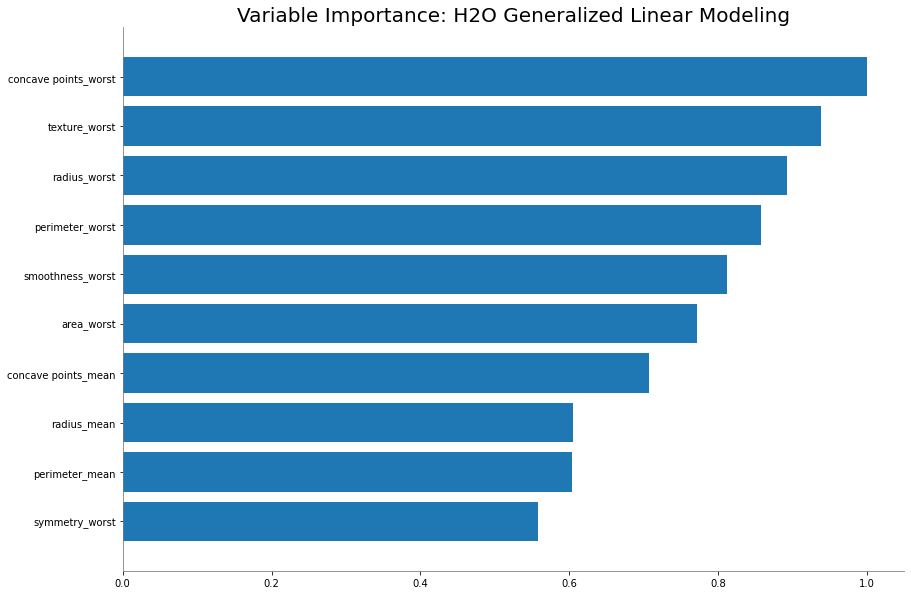

In [48]:
best_glm2.varimp_plot()

## Example 3 - Using AutoML

In [49]:
from h2o.automl import H2OAutoML

In [50]:
##### aml = H2OAutoML(max_runtime_secs=120, seed=1)
##Defaults to 3600 seconds (1 hour).

In [51]:
aml=H2OAutoML(max_runtime_secs=100,seed=1)

In [53]:
aml.train(x=x,y=y,training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid_1_AutoML_1_20220615_221514_model_4


Status of Neuron Layers: predicting diagnosis, 2-class classification, bernoulli distribution, CrossEntropy loss, 3,302 weights/biases, 46.7 KB, 3,165 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,30,Input,10.0,,,,,,,,,
1,,2,100,RectifierDropout,0.0,0.0,0.0,0.005702,0.019478,0.0,0.000607,0.12217,0.495349,0.056502
2,,3,2,Softmax,,0.0,0.0,0.001008,0.000378,0.0,0.064701,0.528004,-0.001024,0.074918




ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.016651834061396434
RMSE: 0.12904198565349354
LogLoss: 0.05726320587512772
Mean Per-Class Error: 0.020722958057395102
AUC: 0.9980132450331126
AUCPR: 0.9970376694130805
Gini: 0.9960264900662252

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.604441401677304: 


,,B,M,Error,Rate
0,B,238.0,2.0,0.0083,(2.0/240.0)
1,M,5.0,146.0,0.0331,(5.0/151.0)
2,Total,243.0,148.0,0.0179,(7.0/391.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,6.044414e-01,0.976589,84.0
1,max f2,1.629263e-01,0.978975,93.0
2,max f0point5,6.044414e-01,0.982503,84.0
3,max accuracy,6.044414e-01,0.982097,84.0
4,max precision,1.000000e+00,1.000000,0.0
5,max recall,1.224532e-02,1.000000,109.0
6,max specificity,1.000000e+00,1.000000,0.0
7,max absolute_mcc,6.044414e-01,0.962225,84.0
8,max min_per_class_accuracy,4.513519e-01,0.973510,87.0
9,max mean_per_class_accuracy,6.044414e-01,0.979277,84.0



Gains/Lift Table: Avg response rate: 38.62 %, avg score: 38.18 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010230,1.000000e+00,2.589404,2.589404,1.000000,1.000000e+00,1.000000,1.000000,0.026490,0.026490,158.940397,158.940397,0.026490
1,2,0.020460,1.000000e+00,2.589404,2.589404,1.000000,1.000000e+00,1.000000,1.000000,0.026490,0.052980,158.940397,158.940397,0.052980
2,3,0.030691,1.000000e+00,2.589404,2.589404,1.000000,1.000000e+00,1.000000,1.000000,0.026490,0.079470,158.940397,158.940397,0.079470
3,4,0.040921,1.000000e+00,2.589404,2.589404,1.000000,1.000000e+00,1.000000,1.000000,0.026490,0.105960,158.940397,158.940397,0.105960
4,5,0.051151,1.000000e+00,2.589404,2.589404,1.000000,1.000000e+00,1.000000,1.000000,0.026490,0.132450,158.940397,158.940397,0.132450
5,6,0.102302,1.000000e+00,2.589404,2.589404,1.000000,1.000000e+00,1.000000,1.000000,0.132450,0.264901,158.940397,158.940397,0.264901
6,7,0.150895,9.999999e-01,2.589404,2.589404,1.000000,1.000000e+00,1.000000,1.000000,0.125828,0.390728,158.940397,158.940397,0.390728
7,8,0.202046,9.999985e-01,2.589404,2.589404,1.000000,9.999995e-01,1.000000,1.000000,0.132450,0.523179,158.940397,158.940397,0.523179
8,9,0.301790,9.996227e-01,2.589404,2.589404,1.000000,9.999161e-01,1.000000,0.999972,0.258278,0.781457,158.940397,158.940397,0.781457
9,10,0.401535,1.629263e-01,2.058244,2.457460,0.794872,7.760835e-01,0.949045,0.944357,0.205298,0.986755,105.824418,145.745982,0.953422




ModelMetricsBinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.022149512315462645
RMSE: 0.14882712224410793
LogLoss: 0.08795995844880541
Mean Per-Class Error: 0.016183774834437115
AUC: 0.9974889624724061
AUCPR: 0.9962750614425392
Gini: 0.9949779249448123

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7425009695677093: 


,,B,M,Error,Rate
0,B,237.0,3.0,0.0125,(3.0/240.0)
1,M,3.0,148.0,0.0199,(3.0/151.0)
2,Total,240.0,151.0,0.0153,(6.0/391.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,7.425010e-01,0.980132,53.0
1,max f2,7.425010e-01,0.980132,53.0
2,max f0point5,7.425010e-01,0.980132,53.0
3,max accuracy,7.425010e-01,0.984655,53.0
4,max precision,1.000000e+00,1.000000,0.0
5,max recall,2.529978e-03,1.000000,80.0
6,max specificity,1.000000e+00,1.000000,0.0
7,max absolute_mcc,7.425010e-01,0.967632,53.0
8,max min_per_class_accuracy,7.425010e-01,0.980132,53.0
9,max mean_per_class_accuracy,7.425010e-01,0.983816,53.0



Gains/Lift Table: Avg response rate: 38.62 %, avg score: 39.53 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.212276,1.000000e+00,2.589404,2.589404,1.000000,1.000000e+00,1.000000,1.000000,0.549669,0.549669,158.940397,158.940397,0.549669
1,2,0.301790,9.999887e-01,2.589404,2.589404,1.000000,9.999979e-01,1.000000,0.999999,0.231788,0.781457,158.940397,158.940397,0.781457
2,3,0.401535,5.609019e-01,1.991849,2.440967,0.769231,9.072739e-01,0.942675,0.976966,0.198675,0.980132,99.184921,144.096680,0.942632
3,4,0.501279,1.724800e-04,0.199185,1.994898,0.076923,3.007401e-02,0.770408,0.788554,0.019868,1.000000,-80.081508,99.489796,0.812500
4,5,0.601023,1.170000e-06,0.000000,1.663830,0.000000,2.075128e-05,0.642553,0.657691,0.000000,1.000000,-100.000000,66.382979,0.650000
5,6,0.700767,6.000000e-08,0.000000,1.427007,0.000000,3.056410e-07,0.551095,0.564078,0.000000,1.000000,-100.000000,42.700730,0.487500
6,7,1.000000,0.000000e+00,0.000000,1.000000,0.000000,4.358974e-09,0.386189,0.395287,0.000000,1.000000,-100.000000,0.000000,0.000000




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.979552,0.011432,0.974684,0.974359,1.000000,0.974359,0.974359
1,auc,0.995097,0.002982,0.992021,0.995196,1.000000,0.993823,0.994444
2,err,0.020448,0.011432,0.025316,0.025641,0.000000,0.025641,0.025641
3,err_count,1.600000,0.894427,2.000000,2.000000,0.000000,2.000000,2.000000
4,f0point5,0.978069,0.019734,0.986842,0.967742,1.000000,0.986395,0.949367
5,f1,0.973978,0.014554,0.967742,0.967742,1.000000,0.966667,0.967742
6,f2,0.970333,0.022971,0.949367,0.967742,1.000000,0.947712,0.986842
7,lift_top_group,2.597979,0.169360,2.468750,2.516129,2.888889,2.516129,2.600000
8,logloss,0.119297,0.042127,0.149153,0.135246,0.047969,0.115630,0.148485
9,max_per_class_error,0.040188,0.026315,0.062500,0.032258,0.000000,0.064516,0.041667



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-06-15 22:16:50,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2022-06-15 22:16:50,9.241 sec,62400 obs/sec,0.797954,1,312.0,0.330227,0.577010,0.539966,0.965232,0.957665,2.589404,0.086957
2,,2022-06-15 22:16:50,9.303 sec,57545 obs/sec,8.094629,10,3165.0,0.129042,0.057263,0.929753,0.998013,0.997038,2.589404,0.017903



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,area_mean,1.000000,1.000000,0.039645
1,concavity_mean,0.924861,0.924861,0.036666
2,concave points_worst,0.882673,0.882673,0.034993
3,area_se,0.882206,0.882206,0.034975
4,compactness_worst,0.878392,0.878392,0.034824
5,texture_se,0.871926,0.871926,0.034567
6,fractal_dimension_mean,0.868718,0.868718,0.034440
7,perimeter_worst,0.867718,0.867718,0.034401
8,area_worst,0.864932,0.864932,0.034290
9,smoothness_se,0.863035,0.863035,0.034215



See the whole table with table.as_data_frame()


In [54]:
lb=aml.leaderboard

In [55]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
DeepLearning_grid_1_AutoML_1_20220615_221514_model_4,0.997489,0.08796,0.996275,0.0161838,0.148827,0.0221495
StackedEnsemble_AllModels_3_AutoML_1_20220615_221514,0.997434,0.119183,0.996165,0.0224338,0.1544,0.0238392
DeepLearning_grid_1_AutoML_1_20220615_221514_model_1,0.997434,0.132434,0.99619,0.0224338,0.142568,0.0203256
DeepLearning_grid_1_AutoML_1_20220615_221514_model_2,0.997351,0.194991,0.996014,0.025745,0.163545,0.0267468
DeepLearning_grid_1_AutoML_1_20220615_221514_model_3,0.997323,0.192875,0.996066,0.0236617,0.166738,0.0278016
StackedEnsemble_AllModels_1_AutoML_1_20220615_221514,0.997103,0.0677067,0.995662,0.026973,0.144894,0.0209942
StackedEnsemble_BestOfFamily_4_AutoML_1_20220615_221514,0.996937,0.0672659,0.995467,0.0215784,0.143172,0.0204982
StackedEnsemble_BestOfFamily_1_AutoML_1_20220615_221514,0.996854,0.067917,0.995472,0.020723,0.140689,0.0197934
GLM_1_AutoML_1_20220615_221514,0.996854,0.072568,0.995578,0.019495,0.140589,0.0197653
StackedEnsemble_AllModels_2_AutoML_1_20220615_221514,0.996689,0.0696782,0.995103,0.0236617,0.146049,0.0213303


In [65]:
help(aml.get_best_model)

Help on method get_best_model in module h2o.automl._base:

get_best_model(algorithm=None, criterion=None) method of h2o.automl._estimator.H2OAutoML instance
    Get best model of a given family/algorithm for a given criterion from an AutoML object.
    
    :param algorithm: One of "basemodel", "deeplearning", "drf", "gbm", "glm", "stackedensemble", "xgboost".
                      If None, pick the best model regardless of the algorithm.
    :param criterion: Criterion can be one of the metrics reported in leaderboard. If set to None, the same ordering
                      as in the leaderboard will be used.
                      Avaliable criteria:
                        - Regression metrics: deviance, rmse, mse, mae, rmsle
                        - Binomial metrics: auc, logloss, aucpr, mean_per_class_error, rmse, mse
                        - Multinomial metrics: mean_per_class_error, logloss, rmse, mse
                      The following additional leaderboard information can be

# Save Selected Model

In [64]:
# download the model built above to your local machine
my_local_model = h2o.download_model(aml.leader, path="../models",
                                   export_cross_validation_predictions=True)

In [68]:
gbm=aml.get_best_model("stackedensemble")
gbm_local = h2o.download_model(gbm, path='../models')

In [70]:
gbm.confusion_matrix()
gbm.varimp

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_3_AutoML_1_20220615_221514

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.030508904924817355
RMSE: 0.17466798483069917
LogLoss: 0.15309636400368007
Null degrees of freedom: 390
Residual degrees of freedom: 387
Null deviance: 521.6041179862931
Residual deviance: 119.72135665087784
AIC: 127.72135665087784
AUC: 0.9989238410596026
AUCPR: 0.9983733651999931
Gini: 0.9978476821192053

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4202214319425708: 


,,B,M,Error,Rate
0,B,238.0,2.0,0.0083,(2.0/240.0)
1,M,2.0,149.0,0.0132,(2.0/151.0)
2,Total,240.0,151.0,0.0102,(4.0/391.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.420221,0.986755,117.0
1,max f2,0.420221,0.986755,117.0
2,max f0point5,0.454332,0.990629,115.0
3,max accuracy,0.454332,0.989770,115.0
4,max precision,0.939786,1.000000,0.0
5,max recall,0.283975,1.000000,134.0
6,max specificity,0.939786,1.000000,0.0
7,max absolute_mcc,0.454332,0.978426,115.0
8,max min_per_class_accuracy,0.420221,0.986755,117.0
9,max mean_per_class_accuracy,0.420221,0.989211,117.0



Gains/Lift Table: Avg response rate: 38.62 %, avg score: 39.65 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.086957,0.939786,2.589404,2.589404,1.000000,0.939786,1.000000,0.939786,0.225166,0.225166,158.940397,158.940397,0.225166
1,2,0.102302,0.936354,2.589404,2.589404,1.000000,0.937946,1.000000,0.939510,0.039735,0.264901,158.940397,158.940397,0.264901
2,3,0.150895,0.925919,2.589404,2.589404,1.000000,0.930638,1.000000,0.936653,0.125828,0.390728,158.940397,158.940397,0.390728
3,4,0.202046,0.907804,2.589404,2.589404,1.000000,0.918137,1.000000,0.931965,0.132450,0.523179,158.940397,158.940397,0.523179
4,5,0.301790,0.780869,2.589404,2.589404,1.000000,0.854345,1.000000,0.906311,0.258278,0.781457,158.940397,158.940397,0.781457
5,6,0.401535,0.360240,2.058244,2.457460,0.794872,0.588619,0.949045,0.827394,0.205298,0.986755,105.824418,145.745982,0.953422
6,7,0.501279,0.166782,0.132790,1.994898,0.051282,0.247547,0.770408,0.712016,0.013245,1.000000,-86.721005,99.489796,0.812500
7,8,0.601023,0.109253,0.000000,1.663830,0.000000,0.133446,0.642553,0.615998,0.000000,1.000000,-100.000000,66.382979,0.650000
8,9,0.700767,0.079955,0.000000,1.427007,0.000000,0.094524,0.551095,0.541774,0.000000,1.000000,-100.000000,42.700730,0.487500
9,10,0.800512,0.061160,0.000000,1.249201,0.000000,0.068590,0.482428,0.482815,0.000000,1.000000,-100.000000,24.920128,0.325000




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.023839224272514864
RMSE: 0.15439956046736295
LogLoss: 0.11918289239862086
Null degrees of freedom: 390
Residual degrees of freedom: 387
Null deviance: 523.5340734763906
Residual deviance: 93.2010218557215
AIC: 101.2010218557215
AUC: 0.9974337748344371
AUCPR: 0.9961646665793495
Gini: 0.9948675496688741

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.32723783235341874: 


,,B,M,Error,Rate
0,B,234.0,6.0,0.025,(6.0/240.0)
1,M,3.0,148.0,0.0199,(3.0/151.0)
2,Total,237.0,154.0,0.023,(9.0/391.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.327238,0.970492,38.0
1,max f2,0.266587,0.977690,42.0
2,max f0point5,0.695642,0.979021,25.0
3,max accuracy,0.327238,0.976982,38.0
4,max precision,0.929108,1.000000,0.0
5,max recall,0.097139,1.000000,61.0
6,max specificity,0.929108,1.000000,0.0
7,max absolute_mcc,0.327238,0.951751,38.0
8,max min_per_class_accuracy,0.327238,0.975000,38.0
9,max mean_per_class_accuracy,0.327238,0.977566,38.0



Gains/Lift Table: Avg response rate: 38.62 %, avg score: 38.59 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.056266,0.929108,2.589404,2.589404,1.000000,0.929108,1.000000,0.929108,0.145695,0.145695,158.940397,158.940397,0.145695
1,2,0.102302,0.928868,2.589404,2.589404,1.000000,0.928868,1.000000,0.929000,0.119205,0.264901,158.940397,158.940397,0.264901
2,3,0.181586,0.922297,2.589404,2.589404,1.000000,0.922297,1.000000,0.926073,0.205298,0.470199,158.940397,158.940397,0.470199
3,4,0.227621,0.921072,2.589404,2.589404,1.000000,0.921072,1.000000,0.925062,0.119205,0.589404,158.940397,158.940397,0.589404
4,5,0.306905,0.919129,2.589404,2.589404,1.000000,0.919192,1.000000,0.923545,0.205298,0.794702,158.940397,158.940397,0.794702
5,6,0.401535,0.297998,1.959549,2.440967,0.756757,0.677416,0.942675,0.865540,0.185430,0.980132,95.954895,144.096680,0.942632
6,7,0.588235,0.058253,0.106414,1.700000,0.041096,0.092195,0.656522,0.620087,0.019868,1.000000,-89.358614,70.000000,0.670833
7,8,0.703325,0.053984,0.000000,1.421818,0.000000,0.054138,0.549091,0.527478,0.000000,1.000000,-100.000000,42.181818,0.483333
8,9,0.805627,0.050929,0.000000,1.241270,0.000000,0.051071,0.479365,0.466981,0.000000,1.000000,-100.000000,24.126984,0.316667
9,10,0.910486,0.049961,0.000000,1.098315,0.000000,0.049980,0.424157,0.418956,0.000000,1.000000,-100.000000,9.831461,0.145833


<bound method ModelBase.varimp of >

# Closing H2O

In [ ]:
h2o.cluster().shutdown(prompt=True) 